<a href="https://colab.research.google.com/github/tassiogomes/MINDD-ISEP/blob/main/Project_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

###### Installs

In [2]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import sweetviz as sv
import IPython
from lazypredict.Supervised import LazyClassifier

In [3]:
!pip install lazypredict

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners import open_spinner
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/spinners.py", line 8, in <module>
    from pip._internal.utils.compat import WINDOWS
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File

In [4]:
!pip install sweetviz


#Data exploration

#### Data Dictionary

|Column name| Description|
|----|---|
|ID| unique ID of representative|
|Loan Amount| loan amount applied|
|Funded Amount|loan amount funded|
|Funded Amount Investor| loan amount approved by the investors|
|Term| term of loan (in months)|
|Batch Enrolled| batch numbers to representatives|
|Interest Rate| interest rate (%) on loan|
|Grade| grade by the bank|
|Sub Grade| sub-grade by the bank|
|Employment Duration| duration|
|Home Ownership| Owner ship of home|
|Verification Status| Income verification by the bank|
|Payment Plan| if any payment plan has started against loan|
|Loan Title| loan title provided|
|Debit to Income| ratio of representative's total monthly debt repayment divided by self reported monthly income excluding mortgage|
|Delinquency - two years| number of 30+ days delinquency in past 2 years|
|Inquires - six months| total number of inquiries in last 6 months|
|Open Account| number of open credit line in representative's credit line|
|Public Record| number of derogatory public records|
|Revolving Balance| total credit revolving balance|
|Revolving Utilities| amount of credit a representative is using relative to revolving_balance|
|Total Accounts| total number of credit lines available in representatives credit line|
|Initial List Status| unique listing status of the loan - W(Waiting), F(Forwarded)|
|Total Received Interest| total interest received till date|
|Total Received Late Fee| total late fee received till date|
|Recoveries| post charge off gross recovery|
|Collection Recovery Fee| post charge off collection fee|
|Collection 12 months Medical| total collections in last 12 months excluding medical collections|
|Application Type| indicates when the representative is an individual or joint|
|Last week Pay| indicates how long (in weeks) a representative has paid EMI after batch enrolled|
|Accounts Delinquent| number of accounts on which the representative is delinquent|
|Total Collection Amount| total collection amount ever owed|
|Total Current Balance| total current balance from all accounts|
|Total Revolving Credit Limit| total revolving credit limit|
|Loan Status| 1 = Defaulter, 0 = Non Defaulters|

#### Tabular exploration

In [58]:
#Cargar datos
drive.mount('/content/drive')
df = pd.read_csv('drive/My Drive/MINDD/train.csv')
#df = pd.read_csv("/content/drive/MyDrive/train.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
#drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/MyDrive/train.csv")

In [60]:
df.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

Vemos que no tiene valores nulos en ninguna de las columnas

In [62]:
df.drop_duplicates()

ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0      65087372        10000          32236             12329.36286    59   
1       1450153         3609          11940             12191.99692    59   
2       1969101        28276           9311             21603.22455    59   
3       6651430        11170           6954             17877.15585    59   
4      14354669        16890          13226             13539.92667    59   
...         ...          ...            ...                     ...   ...   
67458  16164945        13601           6848             13175.28583    59   
67459  35182714         8323          11046             15637.46301    59   
67460  16435904        15897          32921             12329.45775    59   
67461   5300325        16567           4975             21353.68465    59   
67462  65443173        15353          29875             14207.44860    59   

      Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  ...  \
0         BAT2522922      11.135007     B        C4            MORTGAGE  ...   
1         BAT1586599      12.237563     C        D3                RENT  ...   
2         BAT2136391      12.545884     F        D4            MORTGAGE  ...   
3         BAT2428731      16.731201     C        C3            MORTGAGE  ...   
4         BAT5341619      15.008300     C        D4            MORTGAGE  ...   
...              ...            ...   ...       ...                 ...  ...   
67458     BAT3193689       9.408858     C        A4            MORTGAGE  ...   
67459     BAT1780517       9.972104     C        B3                RENT  ...   
67460     BAT1761981      19.650943     A        F3            MORTGAGE  ...   
67461     BAT2333412      13.169095     D        E3                 OWN  ...   
67462     BAT1930365      16.034631     B        D1            MORTGAGE  ...   

        Recoveries Collection Recovery Fee Collection 12 months Medical  \
0         2.498291                0.793724                            0   
1         2.377215                0.974821                            0   
2         4.316277                1.020075                            0   
3         0.107020                0.749971                            0   
4      1294.818751                0.368953                            0   
...            ...                     ...                          ...   
67458   564.614852                0.865230                            0   
67459     2.015494                1.403368                            0   
67460     5.673092                1.607093                            0   
67461     1.157454                0.207608                            0   
67462     1.856480                0.366386                            0   

      Application Type  Last week Pay  Accounts Delinquent  \
0           INDIVIDUAL             49                    0   
1           INDIVIDUAL            109                    0   
2           INDIVIDUAL             66                    0   
3           INDIVIDUAL             39                    0   
4           INDIVIDUAL             18                    0   
...                ...            ...                  ...   
67458       INDIVIDUAL             69                    0   
67459       INDIVIDUAL             14                    0   
67460       INDIVIDUAL            137                    0   
67461       INDIVIDUAL             73                    0   
67462       INDIVIDUAL             54                    0   

       Total Collection Amount  Total Current Balance  \
0                           31                 311301   
1                           53                 182610   
2                           34                  89801   
3                           40                   9189   
4                          430                 126029   
...                        ...                    ...   
67458                       48                 181775   
67459                    

El dataset no contenia duplicados.

In [63]:
# Tassio
#check null values
df.isnull().sum(axis = 0)

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

No null values

In [64]:
# check if all ids are unique
len(df['ID'].unique()) == len(df.index)

True

In [65]:
def unique_value_for_dataframe(df):
  for cols in df.columns:
    print('----------Unique values in "'+ cols +'" column-------------------')
    print(df[cols].unique())
    print('-----------End of unique values for "' + cols +'" columns ---------------\n' )

unique_value_for_dataframe(df)

----------Unique values in "ID" column-------------------
[65087372  1450153  1969101 ... 16435904  5300325 65443173]
-----------End of unique values for "ID" columns ---------------

----------Unique values in "Loan Amount" column-------------------
[10000  3609 28276 ... 30703 17417  8323]
-----------End of unique values for "Loan Amount" columns ---------------

----------Unique values in "Funded Amount" column-------------------
[32236 11940  9311 ... 17672 32921 29875]
-----------End of unique values for "Funded Amount" columns ---------------

----------Unique values in "Funded Amount Investor" column-------------------
[12329.36286 12191.99692 21603.22455 ... 12329.45775 21353.68465
 14207.4486 ]
-----------End of unique values for "Funded Amount Investor" columns ---------------

----------Unique values in "Term" column-------------------
[59 36 58]
-----------End of unique values for "Term" columns ---------------

----------Unique values in "Batch Enrolled" column------------

In [66]:
# shape
print(df.shape)
# describe
print(df.describe())

(67463, 35)
                 ID   Loan Amount  Funded Amount  Funded Amount Investor  \
count  6.746300e+04  67463.000000   67463.000000            67463.000000   
mean   2.562761e+07  16848.902776   15770.599114            14621.799323   
std    2.109155e+07   8367.865726    8150.992662             6785.345170   
min    1.297933e+06   1014.000000    1014.000000             1114.590204   
25%    6.570288e+06  10012.000000    9266.500000             9831.684984   
50%    1.791565e+07  16073.000000   13042.000000            12793.682170   
75%    4.271521e+07  22106.000000   21793.000000            17807.594120   
max    7.224578e+07  35000.000000   34999.000000            34999.746430   

               Term  Interest Rate  Home Ownership  Debit to Income  \
count  67463.000000   67463.000000    67463.000000     67463.000000   
mean      58.173814      11.846258    80541.502522        23.299241   
std        3.327441       3.718629    45029.120366         8.451824   
min       36.000000

#### Autoreport

In [ ]:
analyze_report = sv.analyze(df)
analyze_report.show_html('analyze.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.



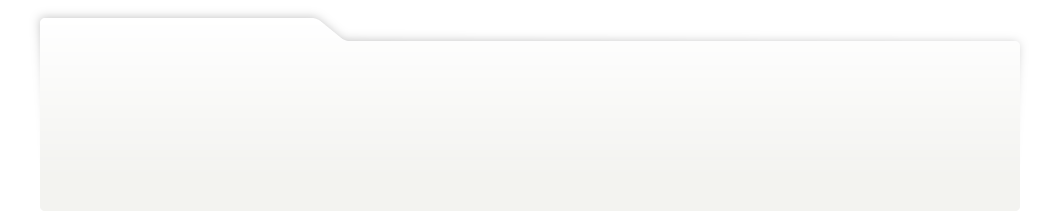
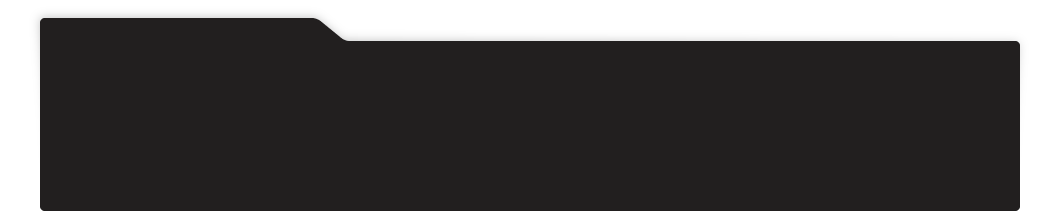
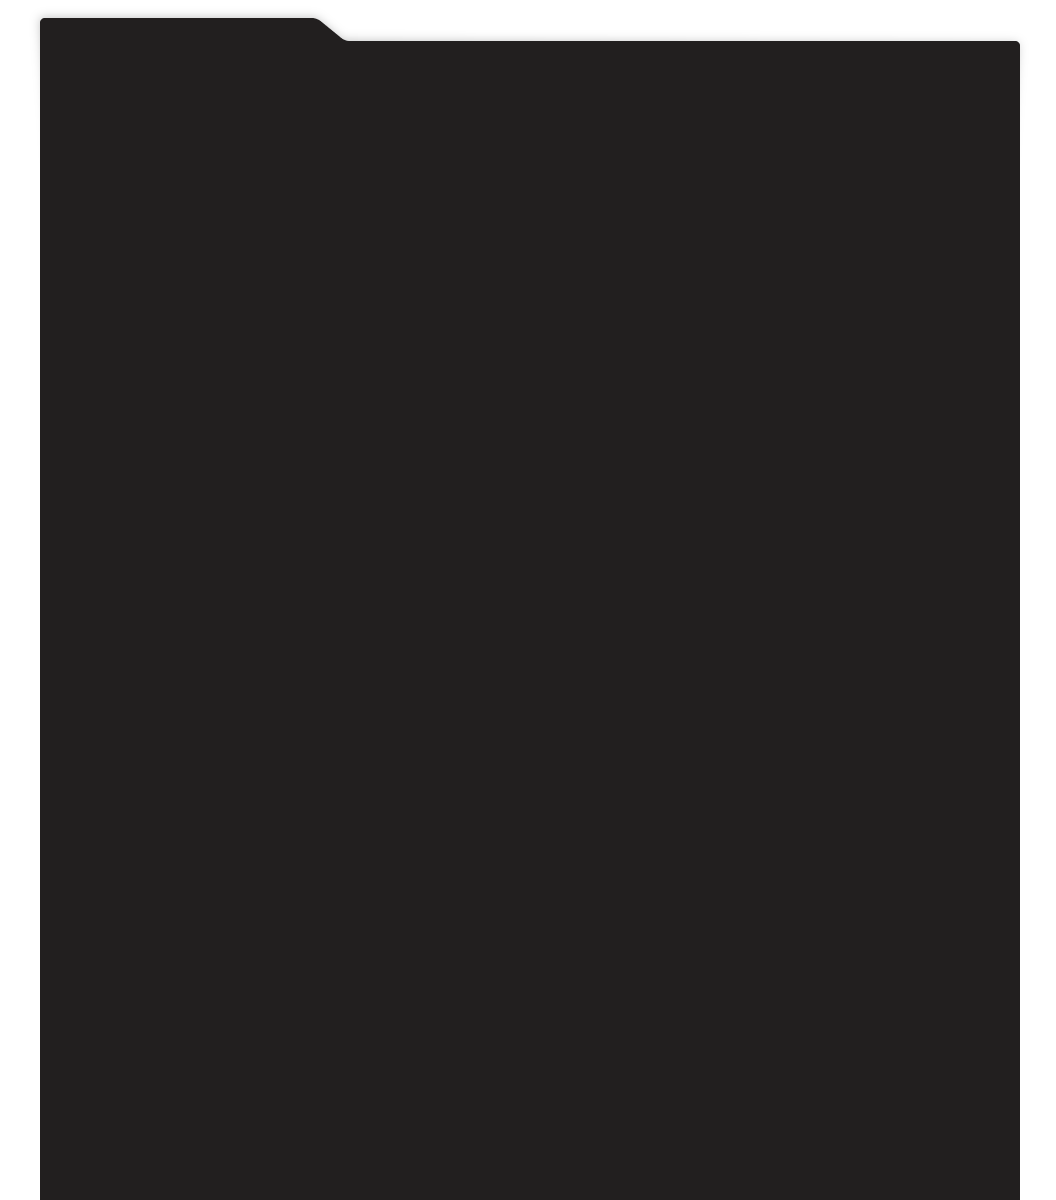
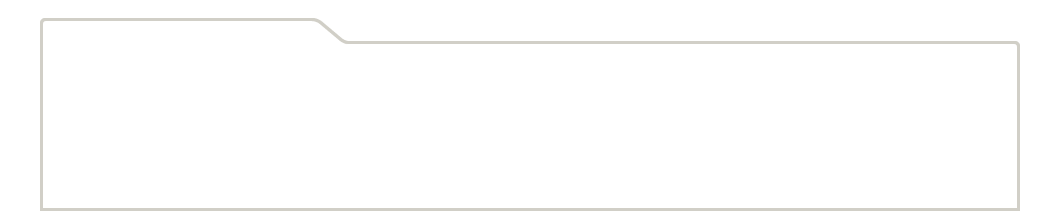
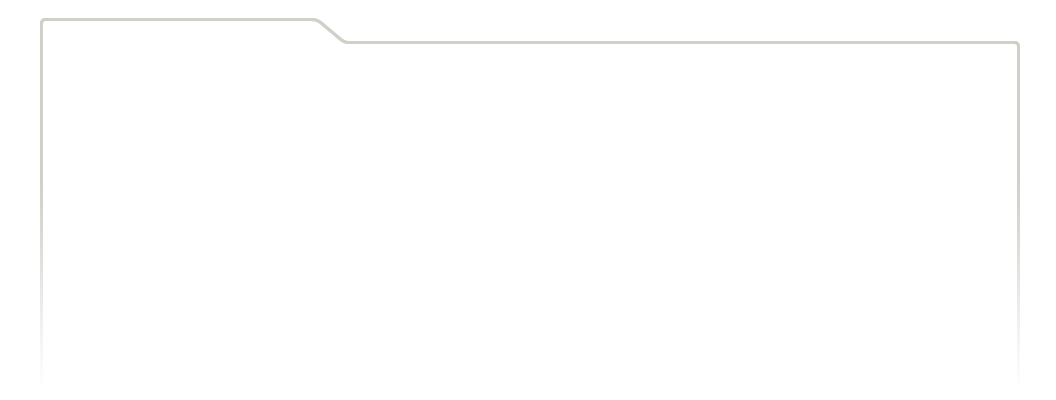
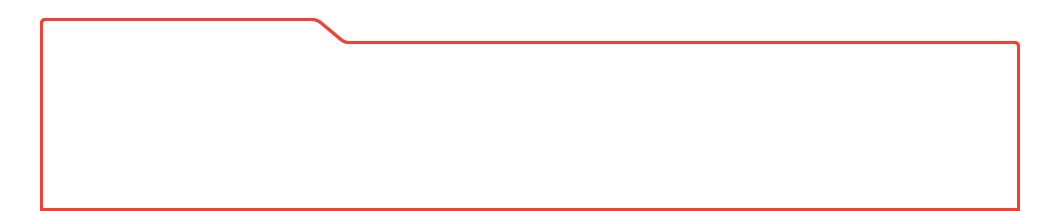
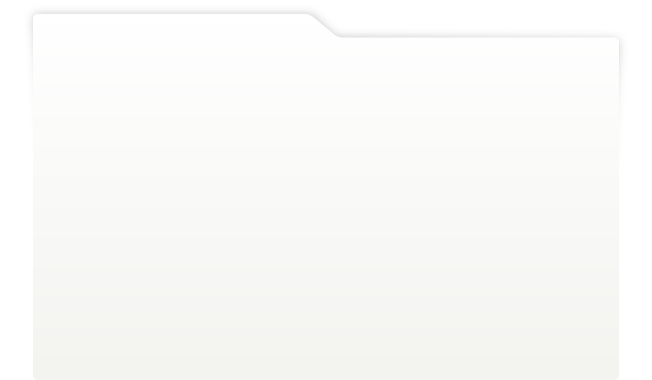
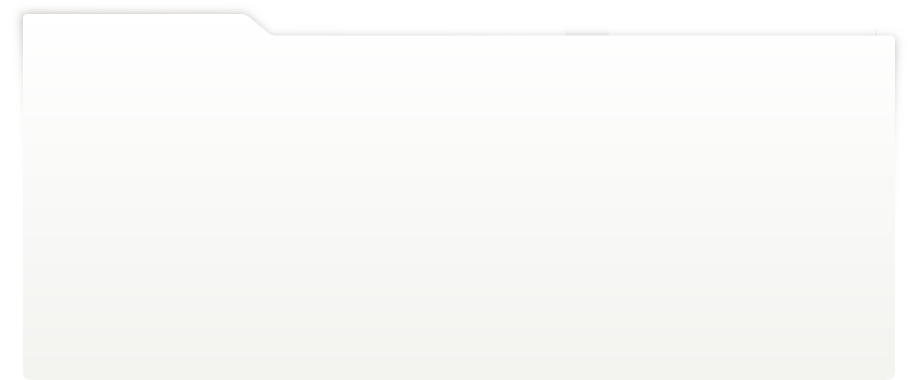
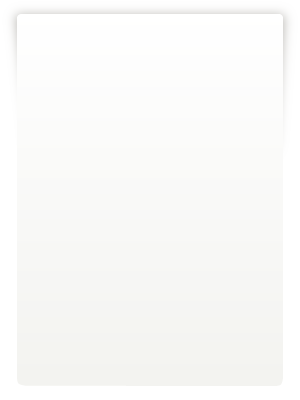
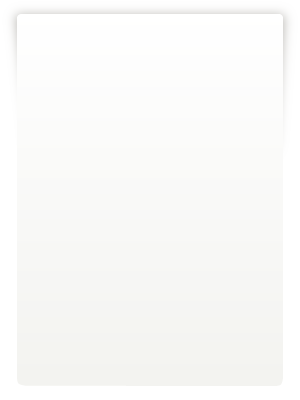
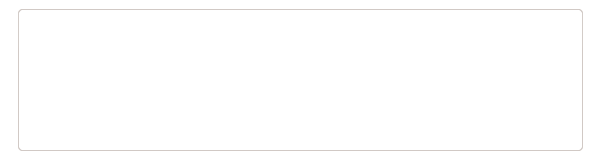
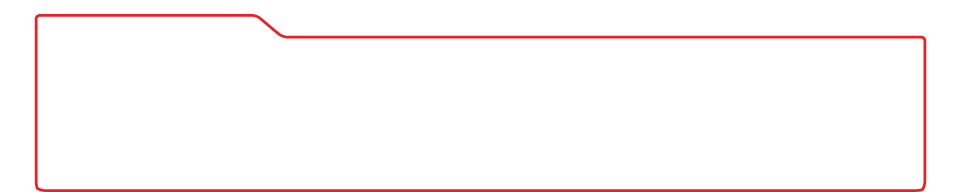
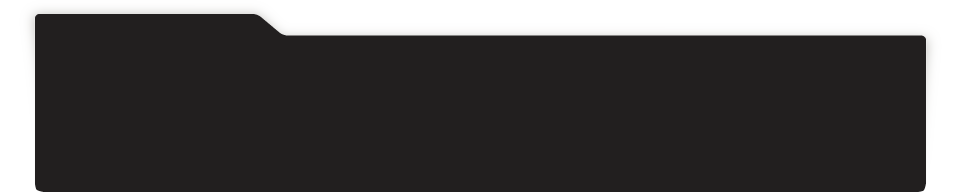
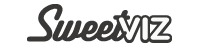
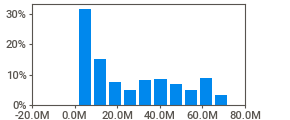
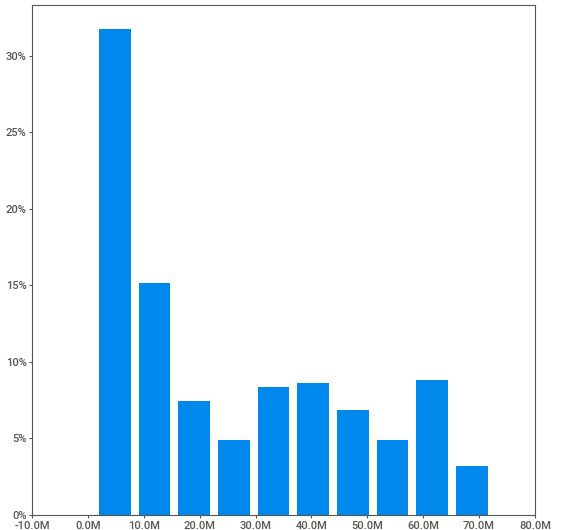
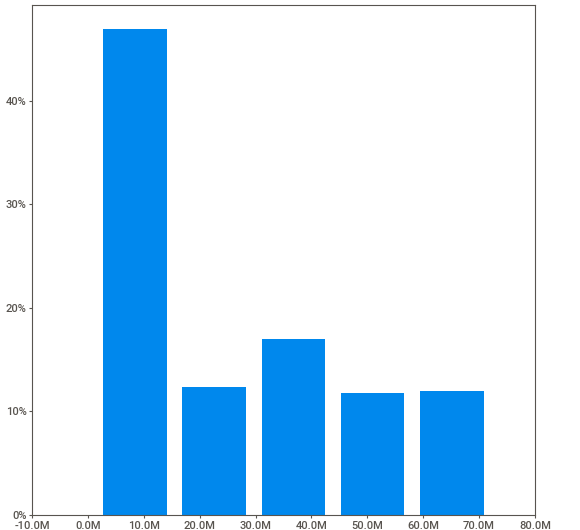
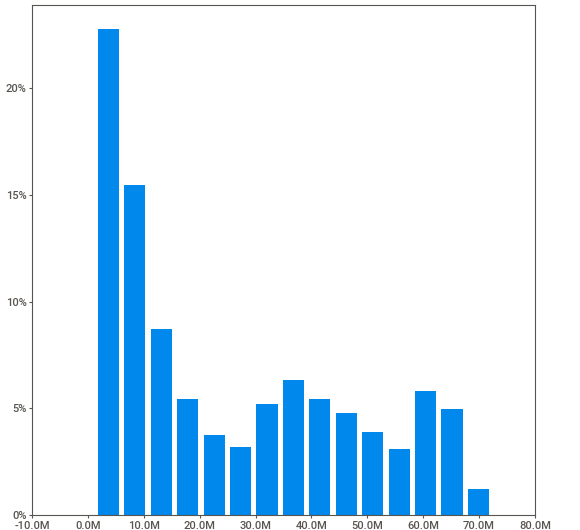
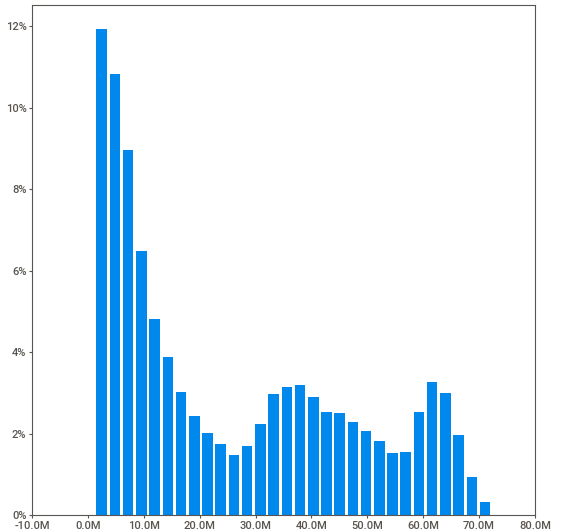
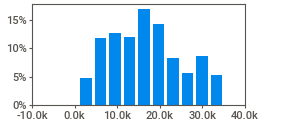
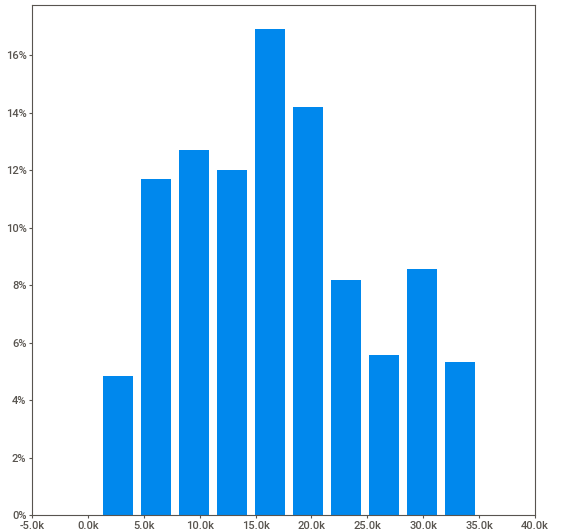
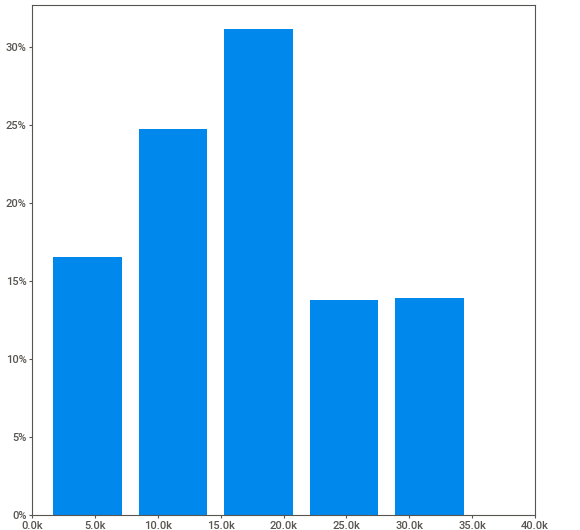
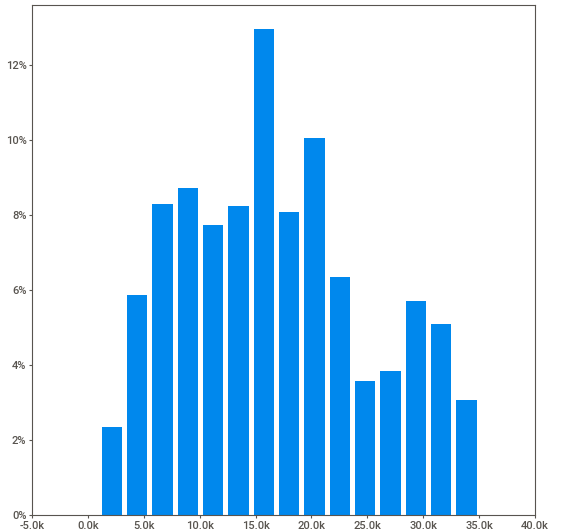
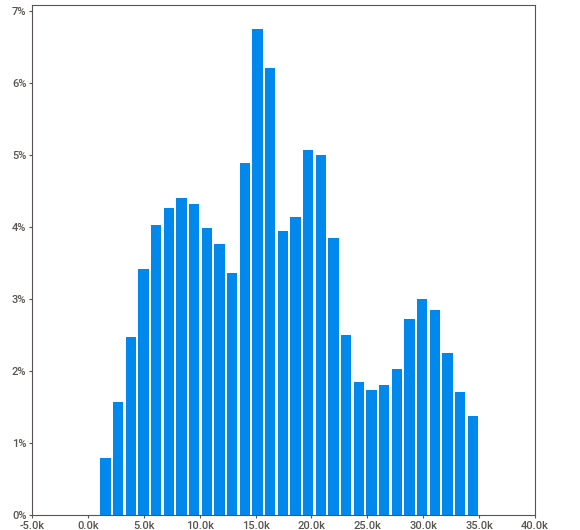
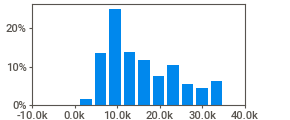
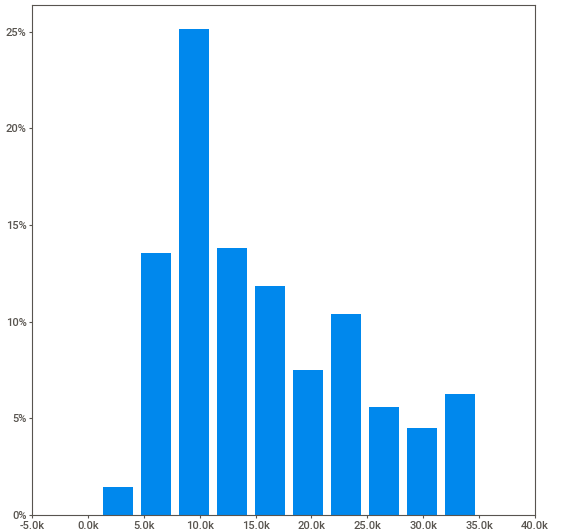
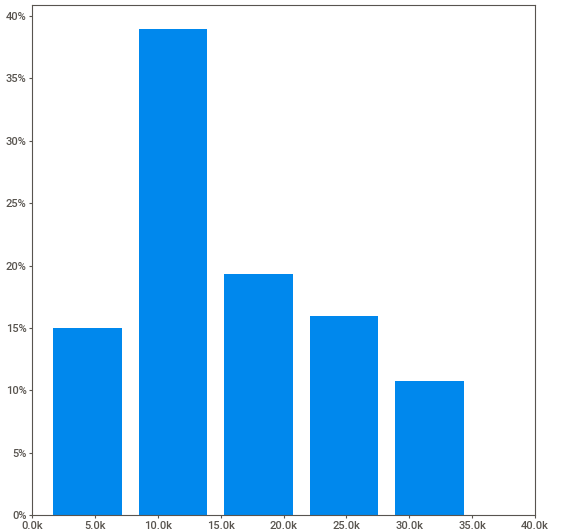
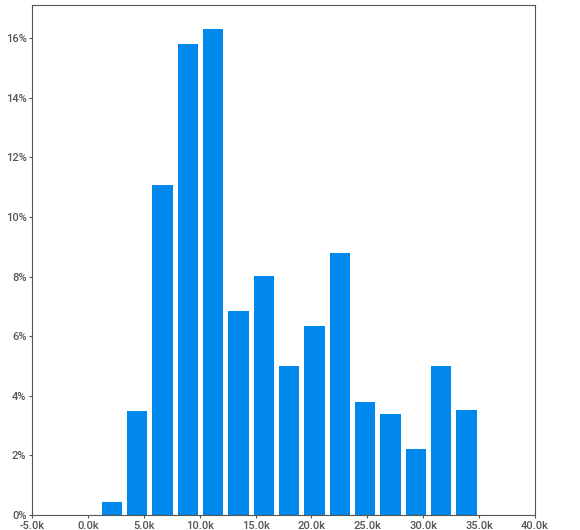
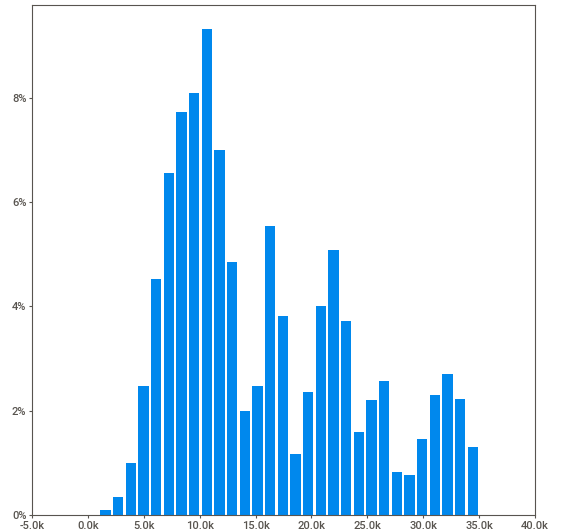
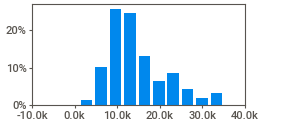
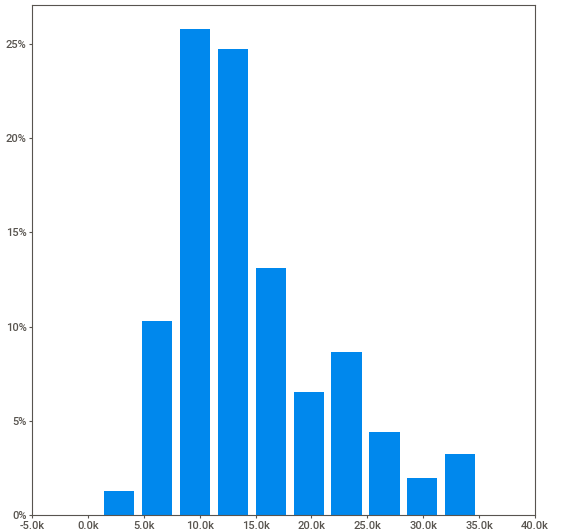
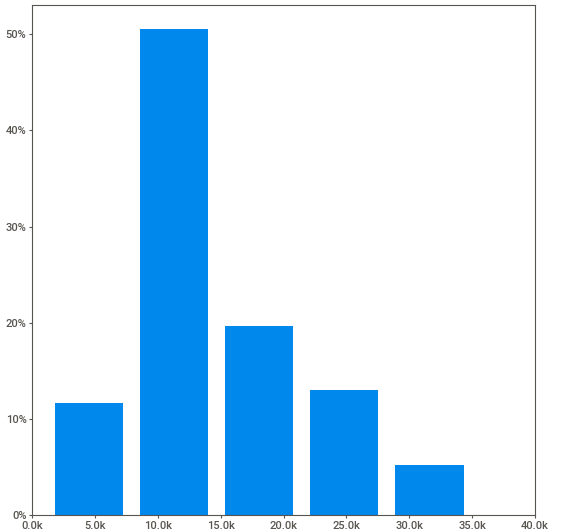
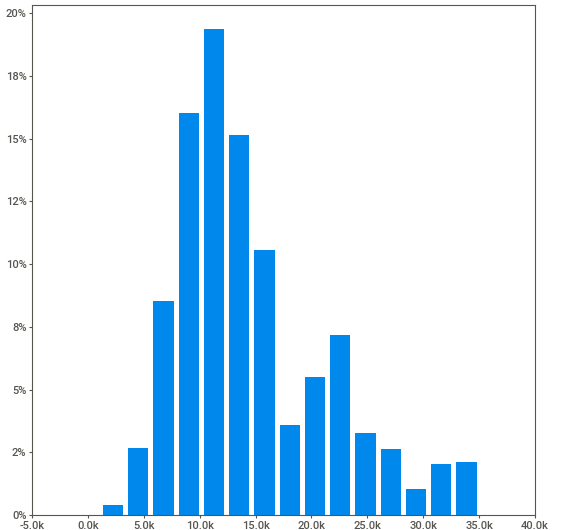
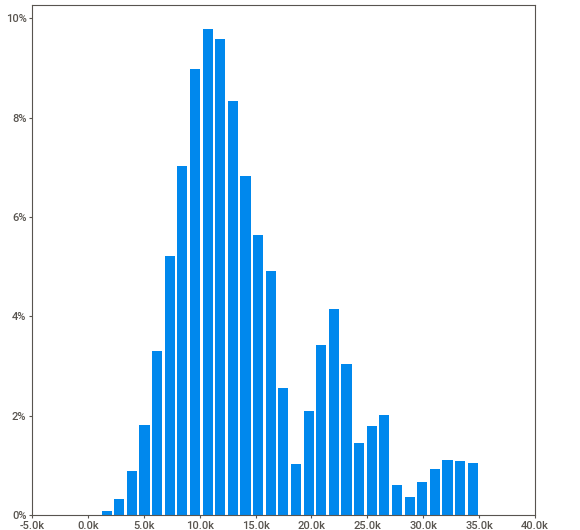
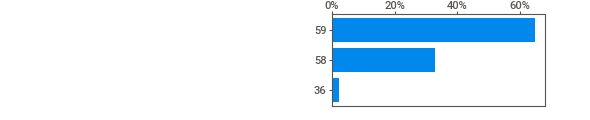
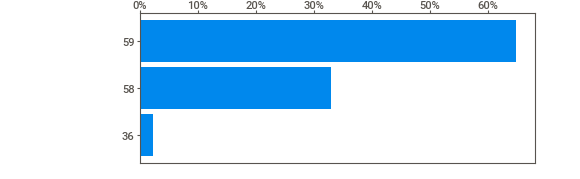
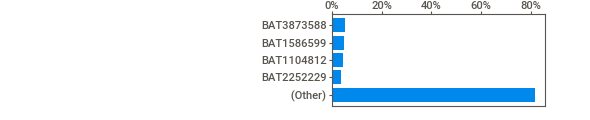
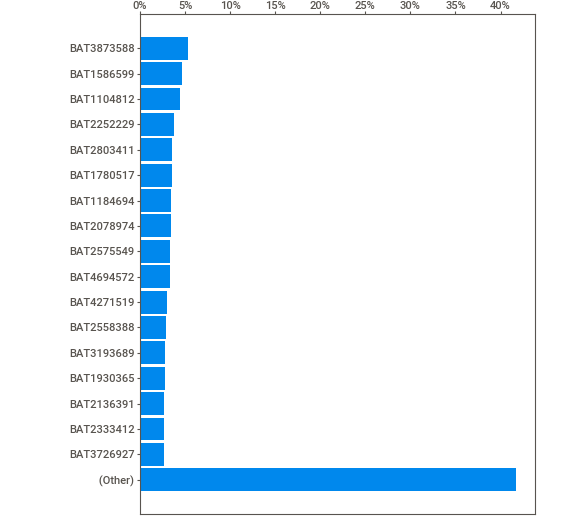
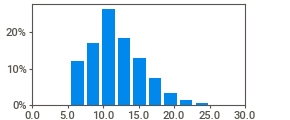
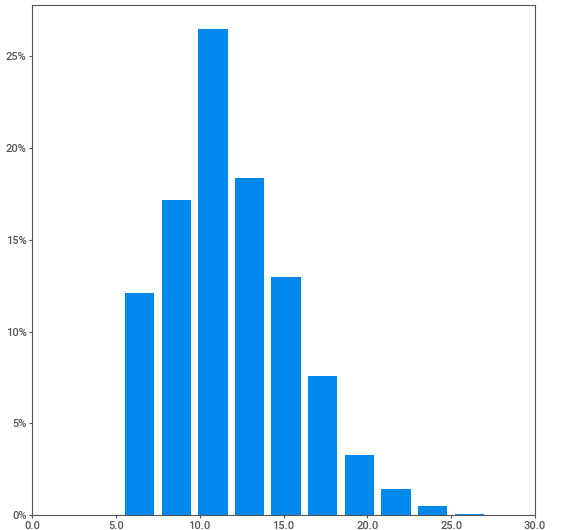
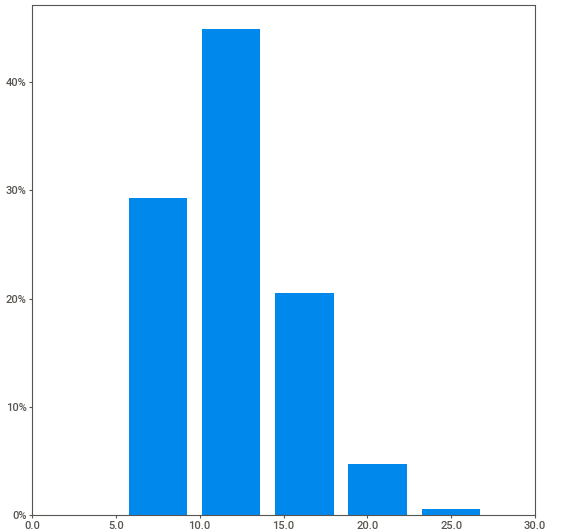
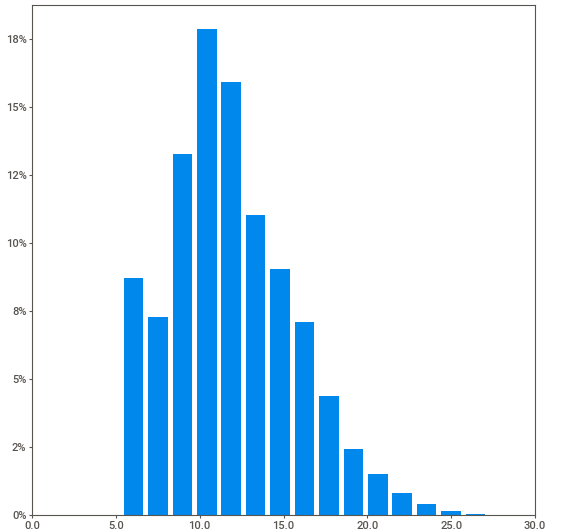
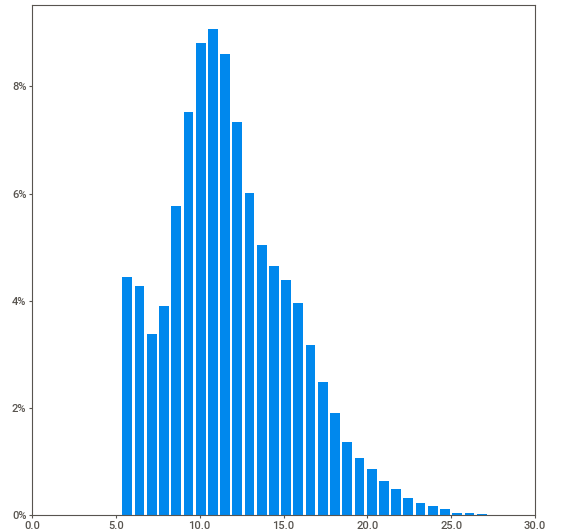
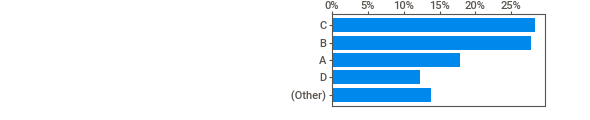
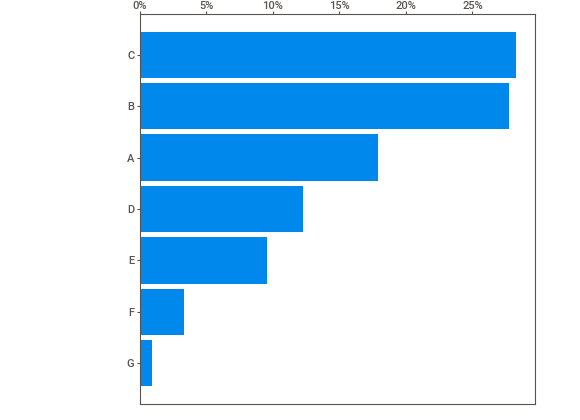
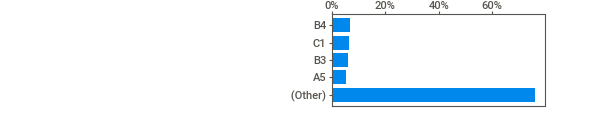
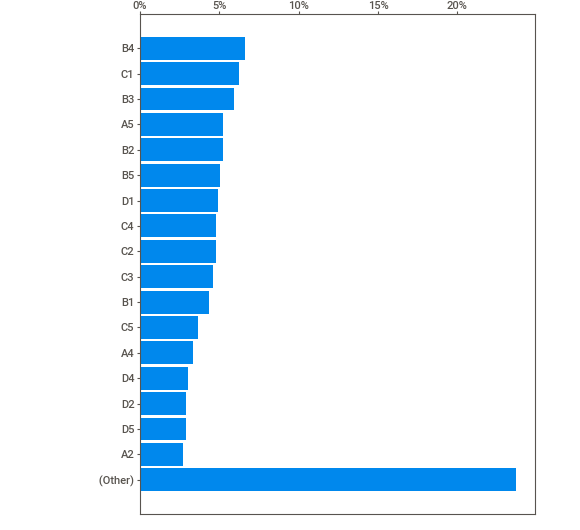
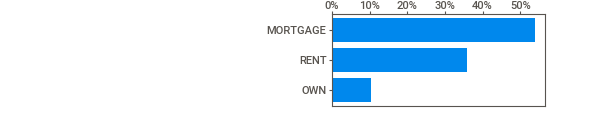
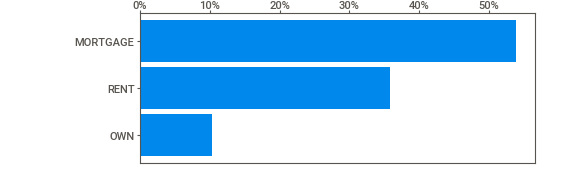
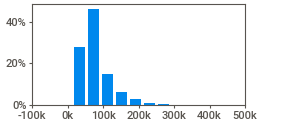
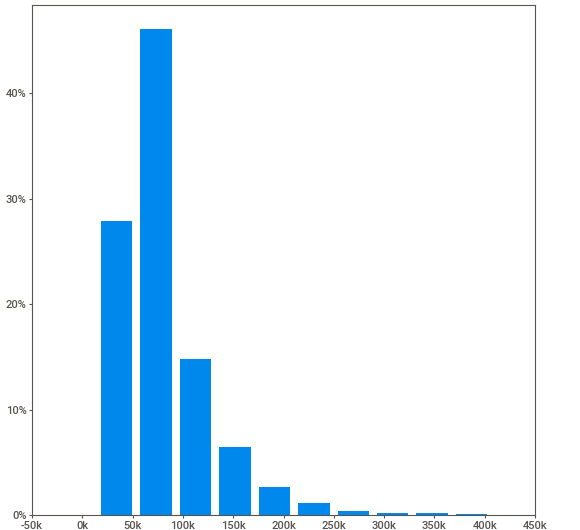
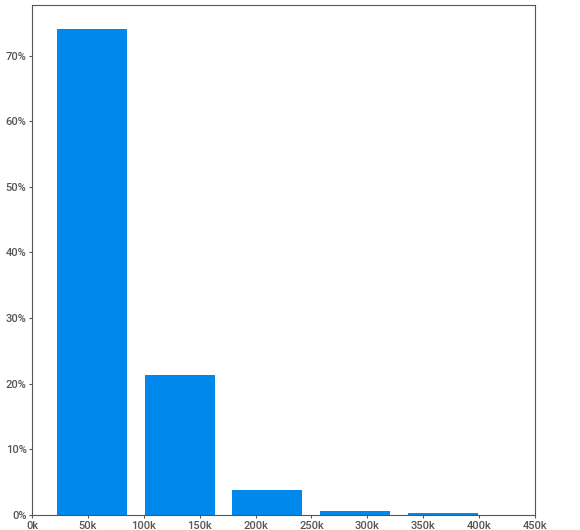
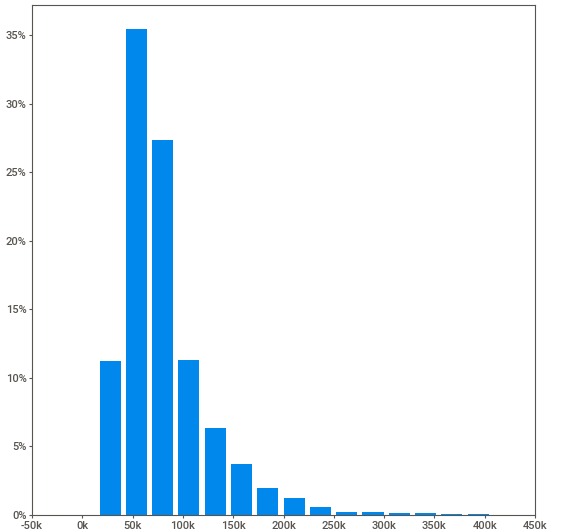
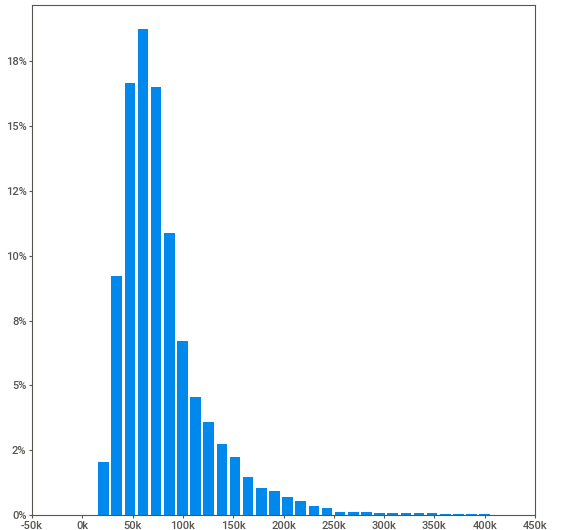
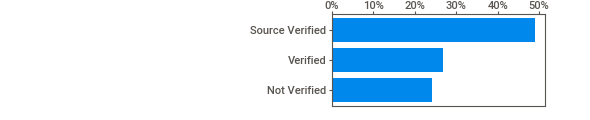
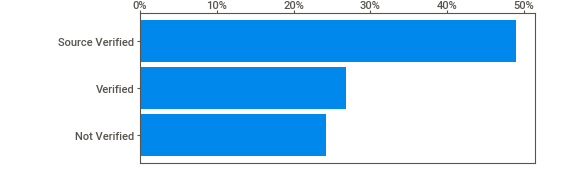
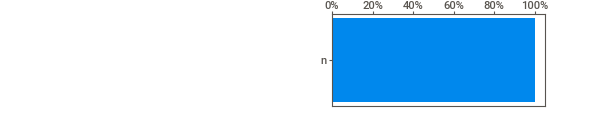
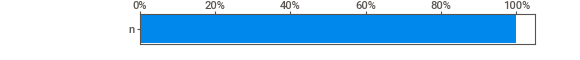
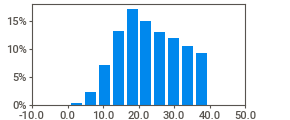
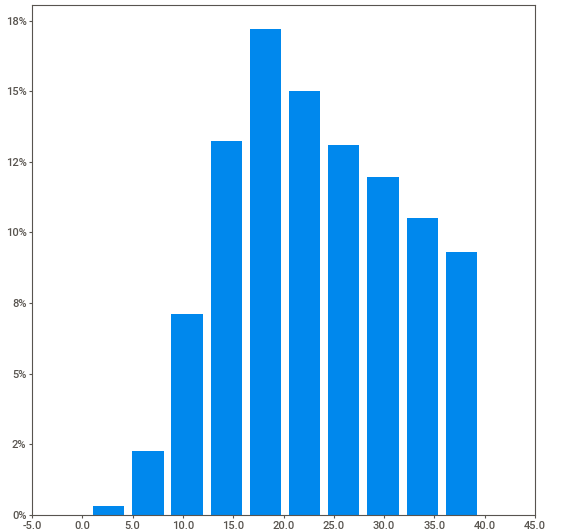
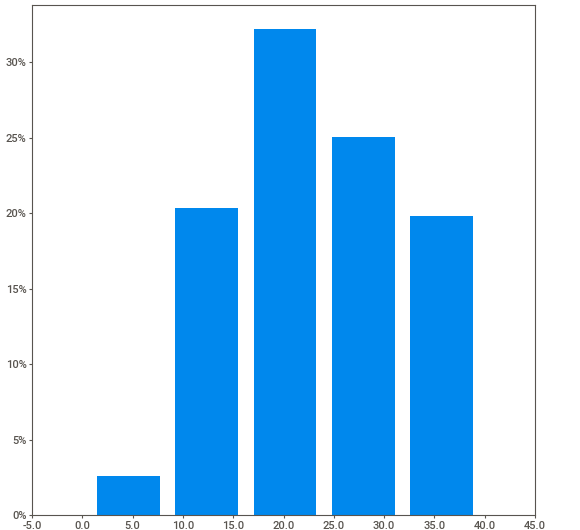
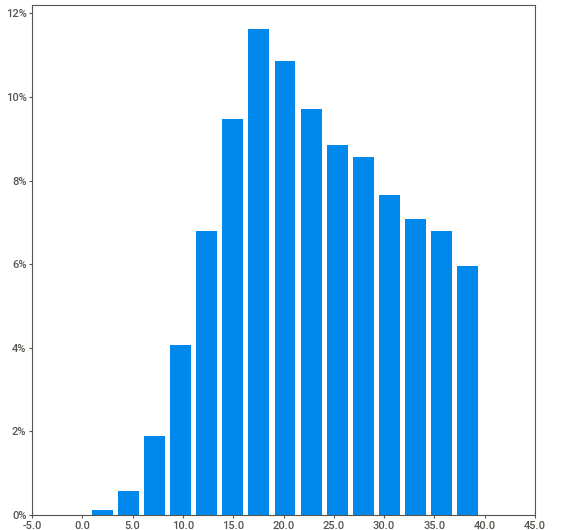
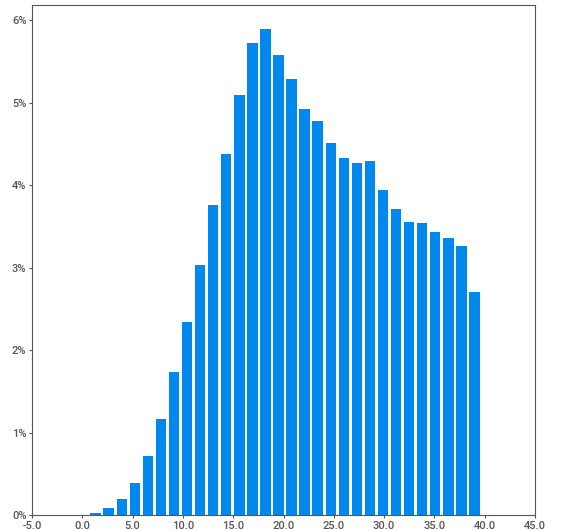
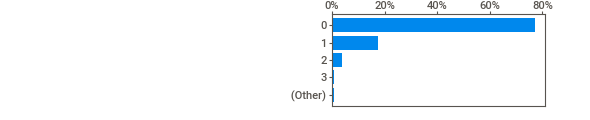
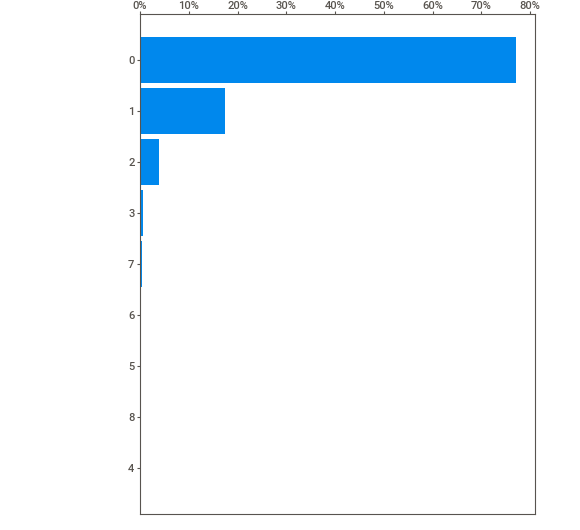
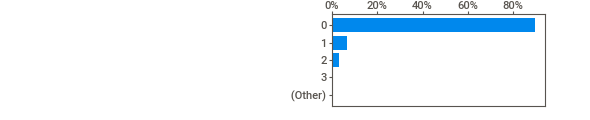
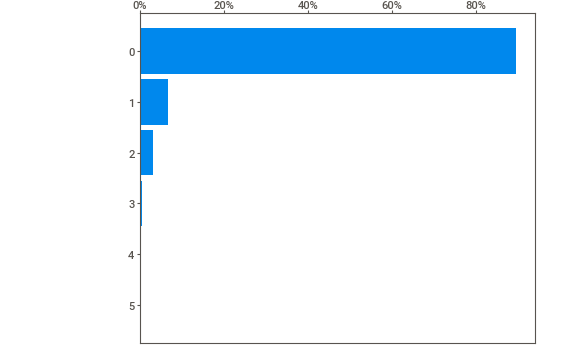
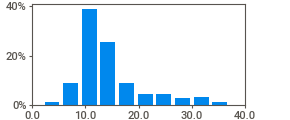
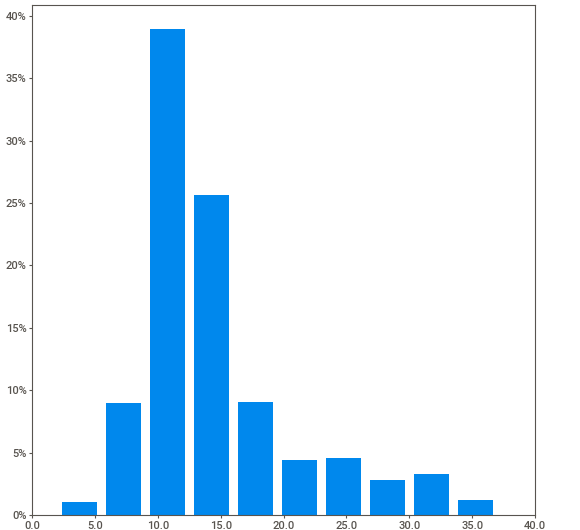
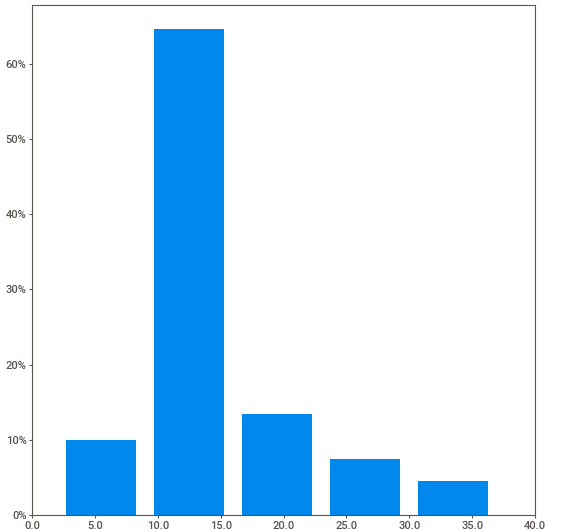
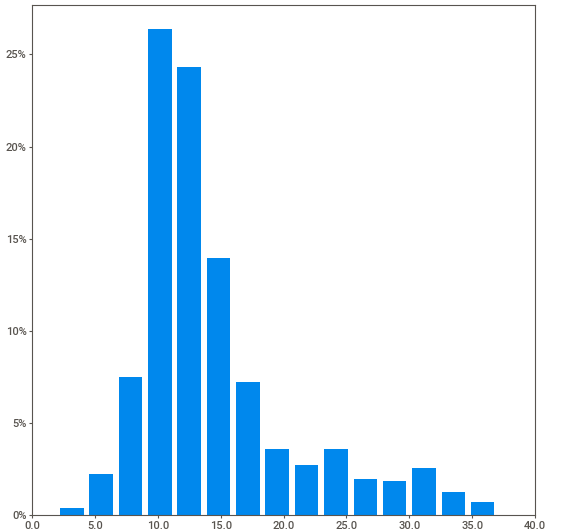
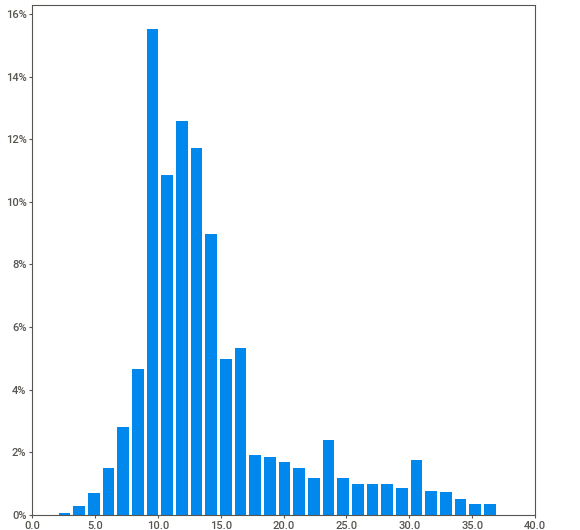
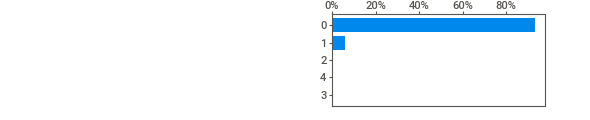
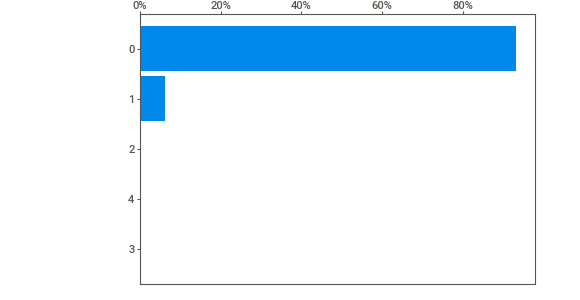
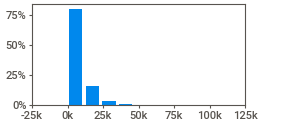
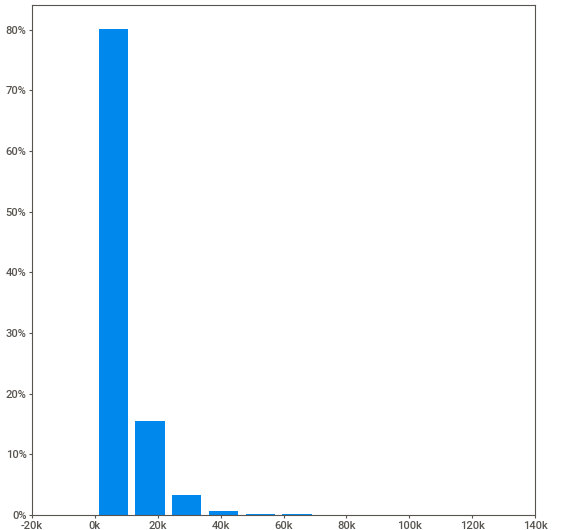
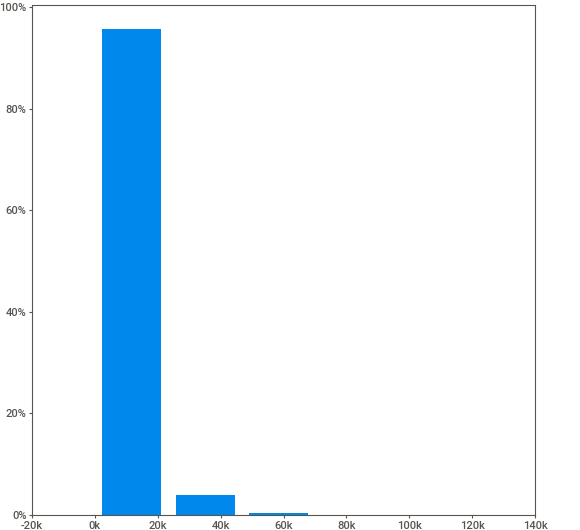
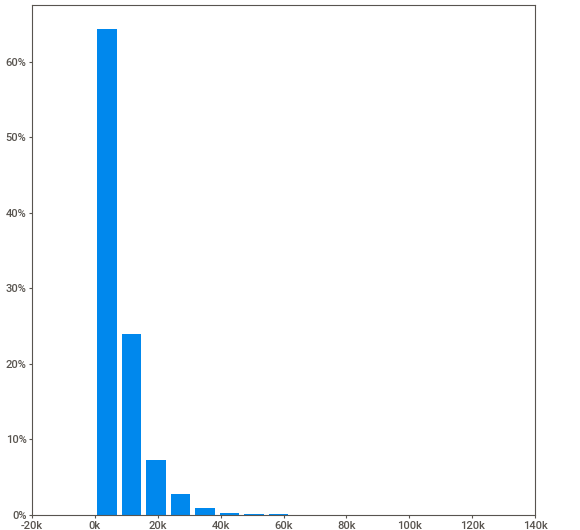
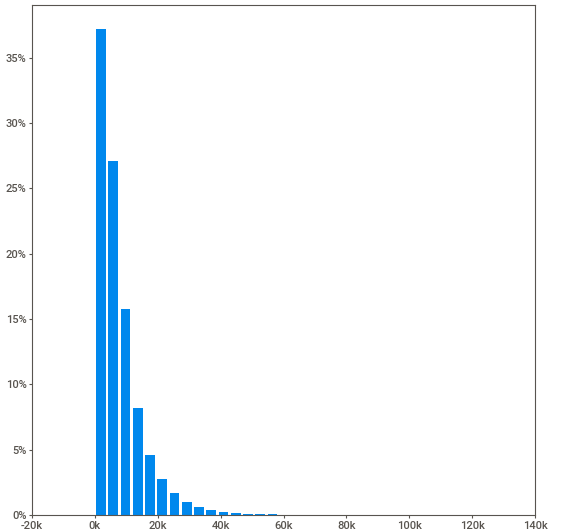
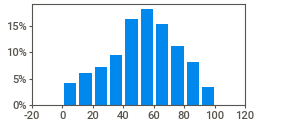
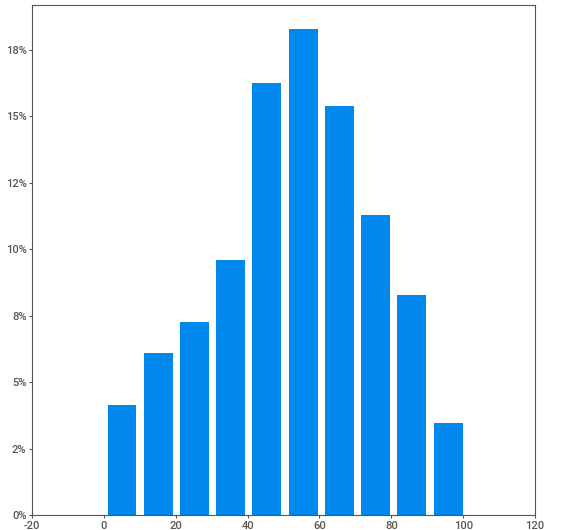
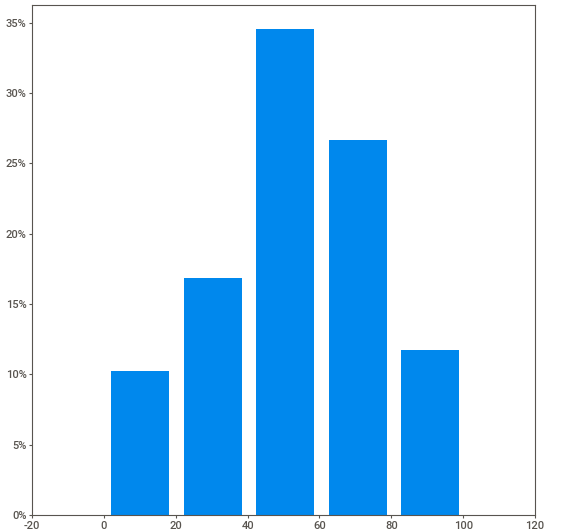
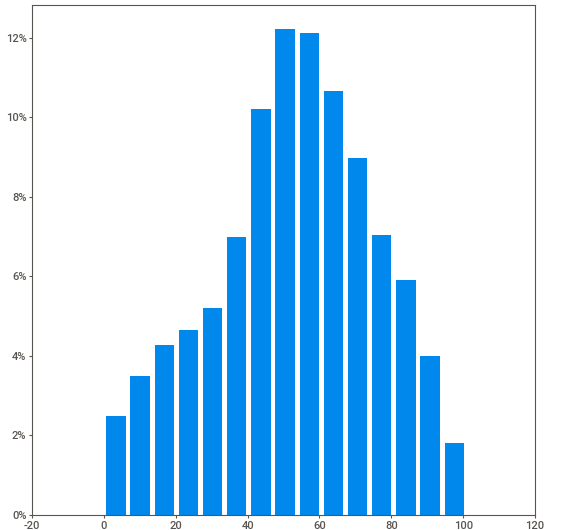
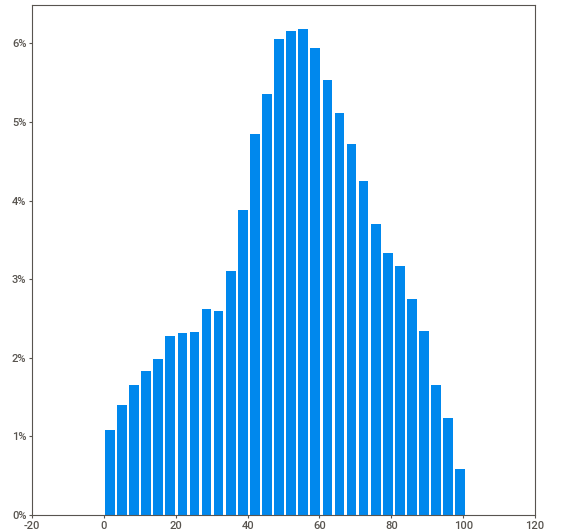
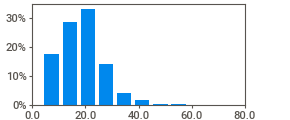
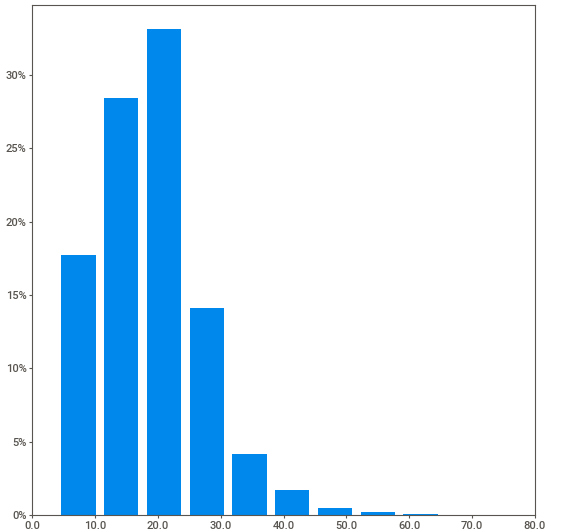
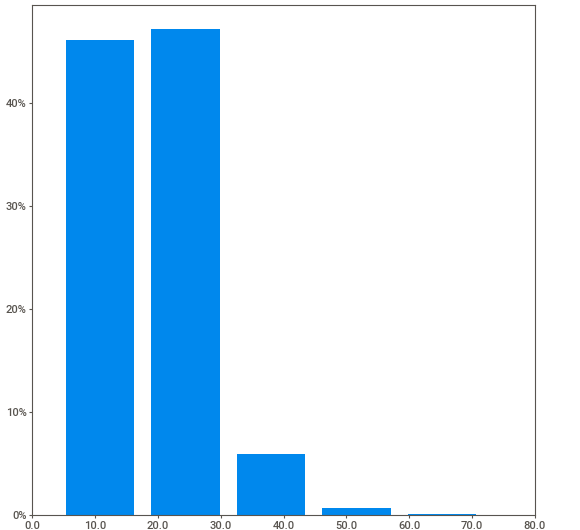
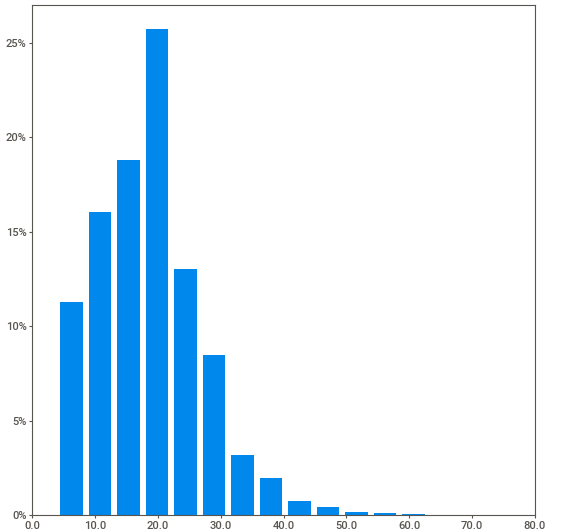
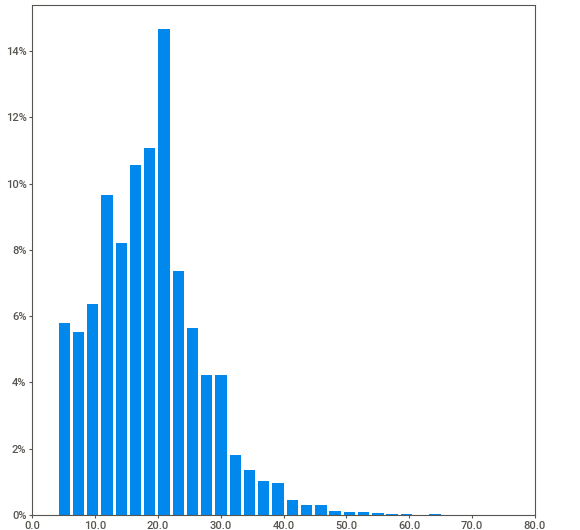
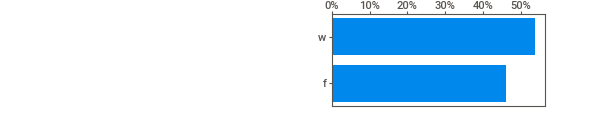
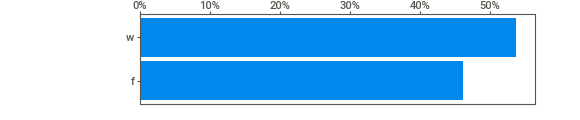
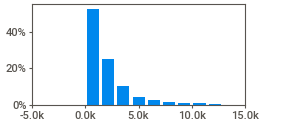
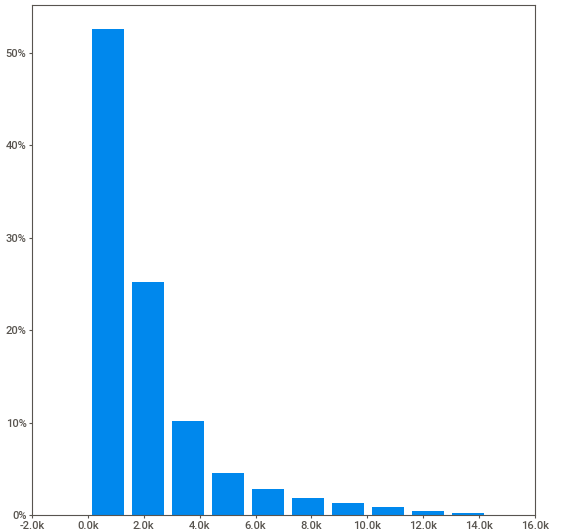
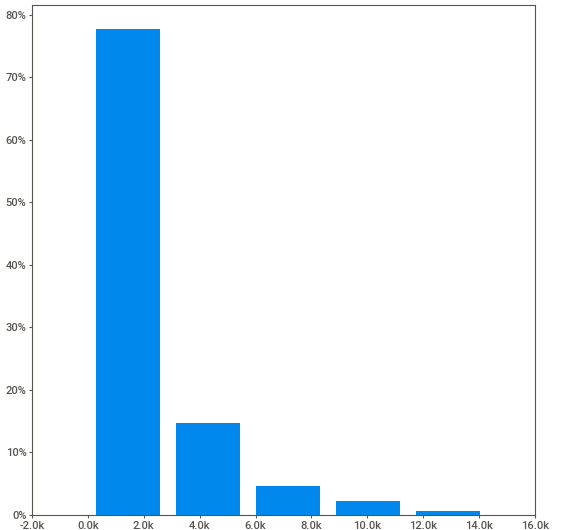
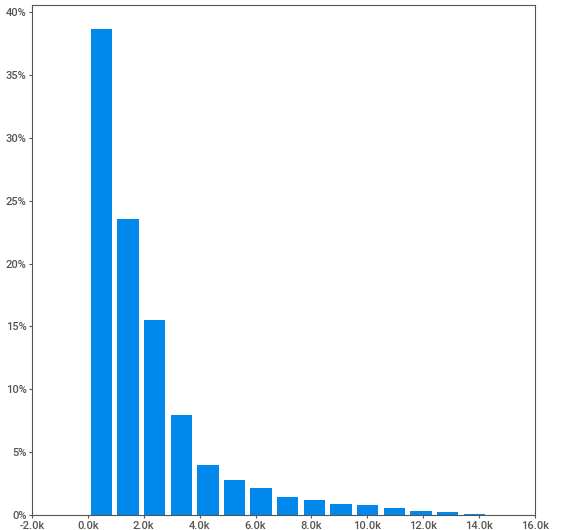
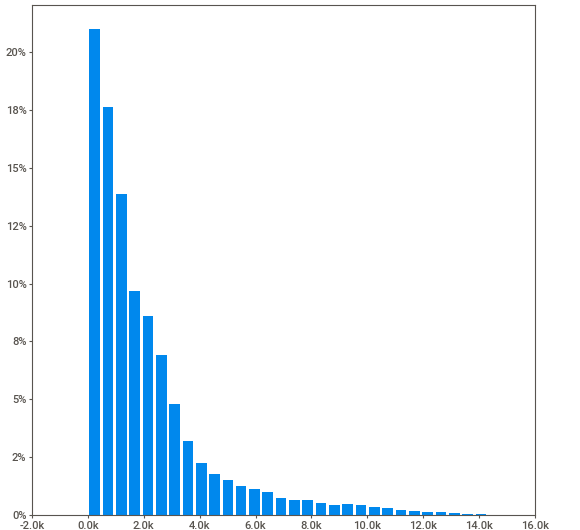
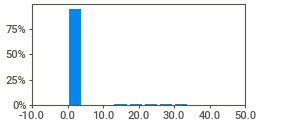
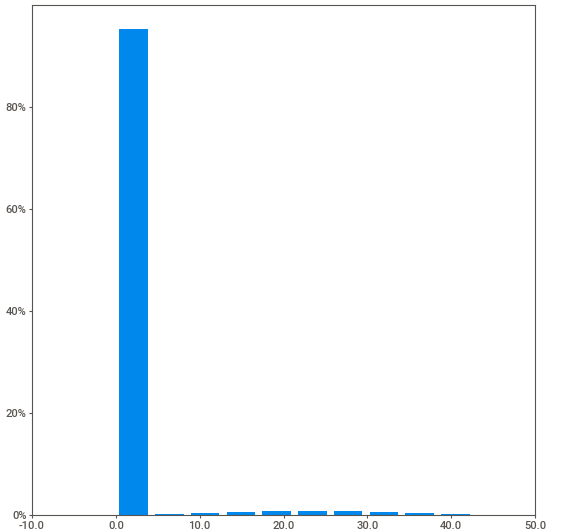
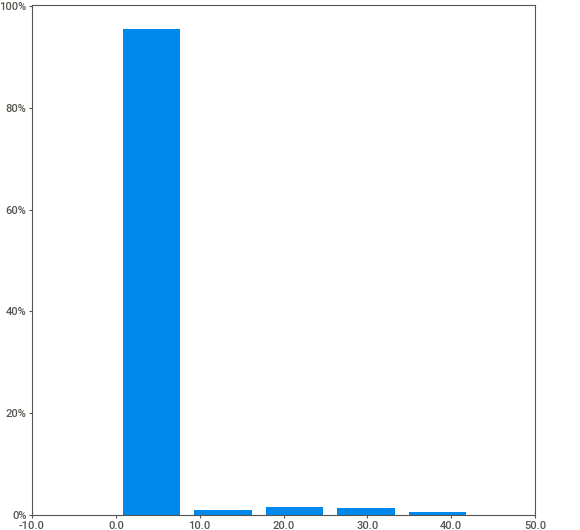
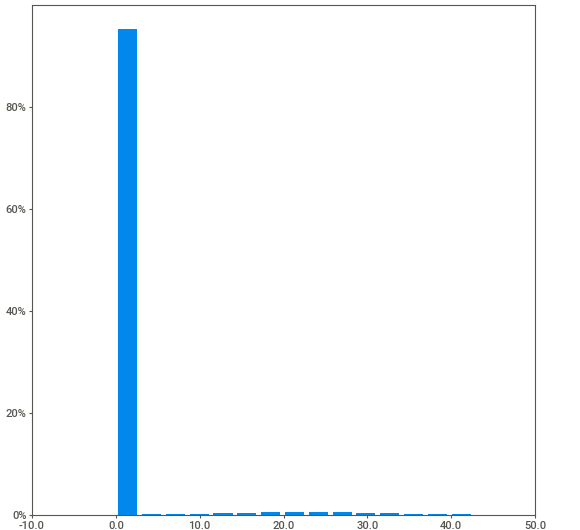
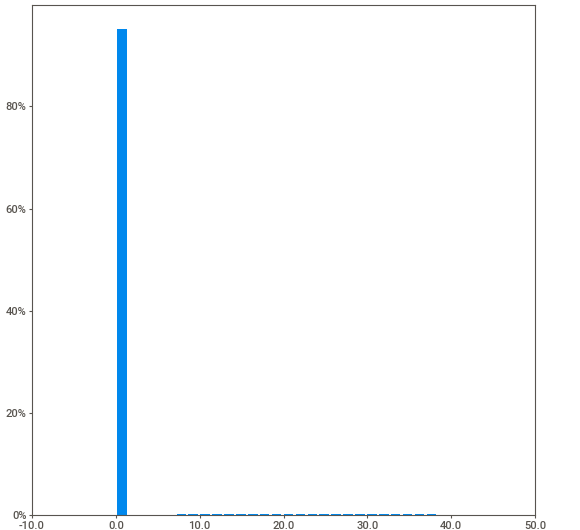
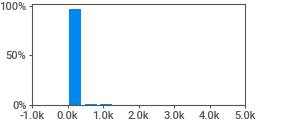
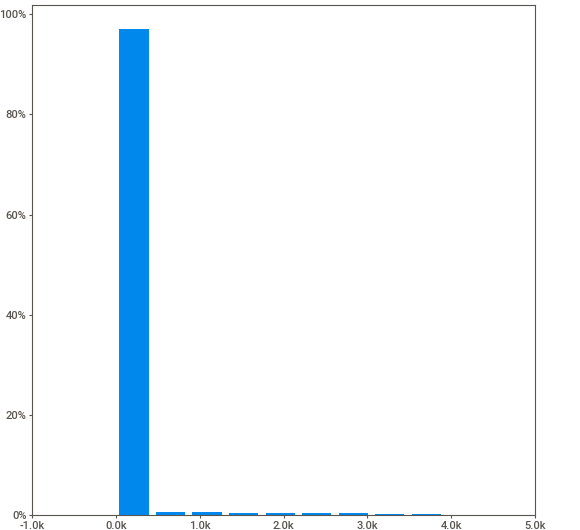
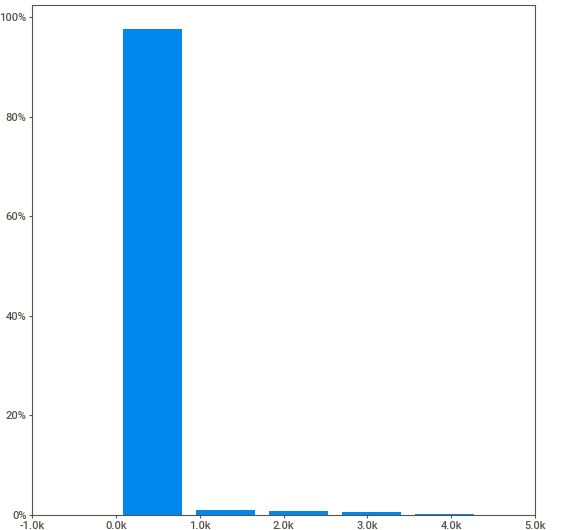
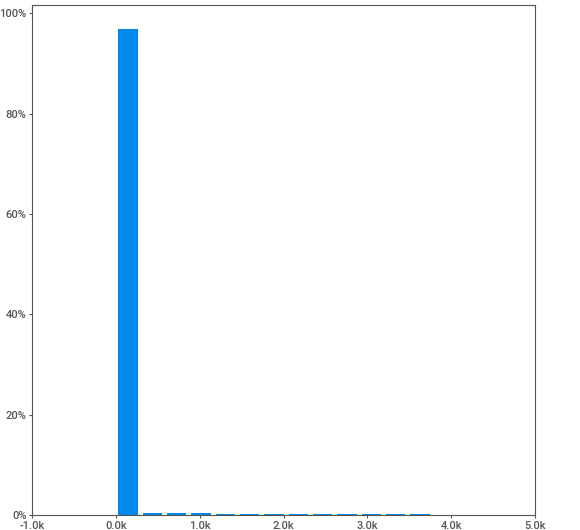
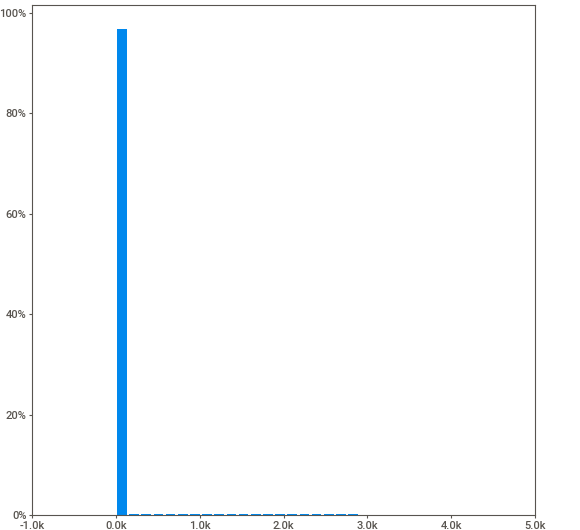
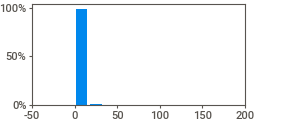
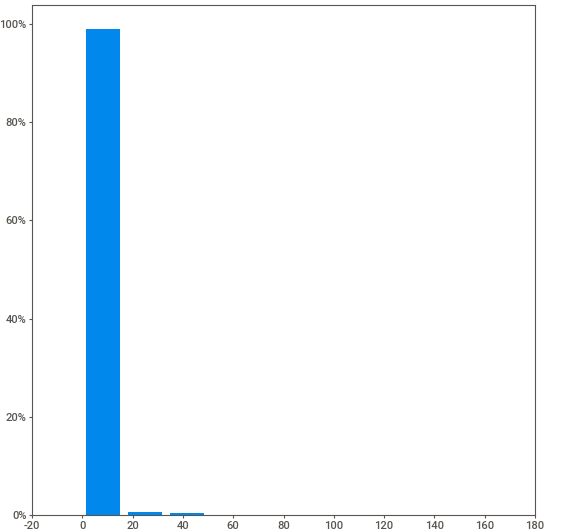
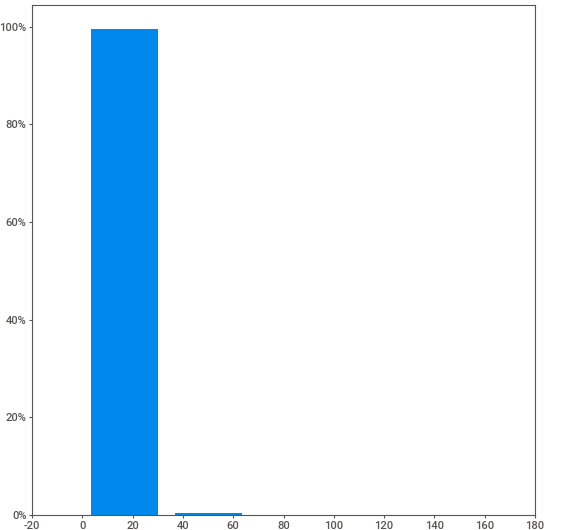
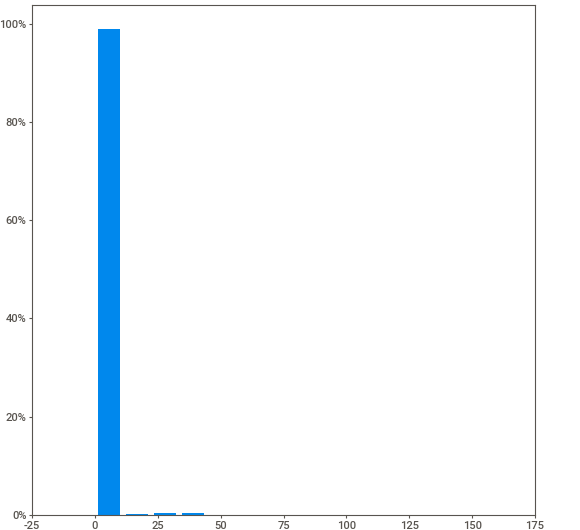
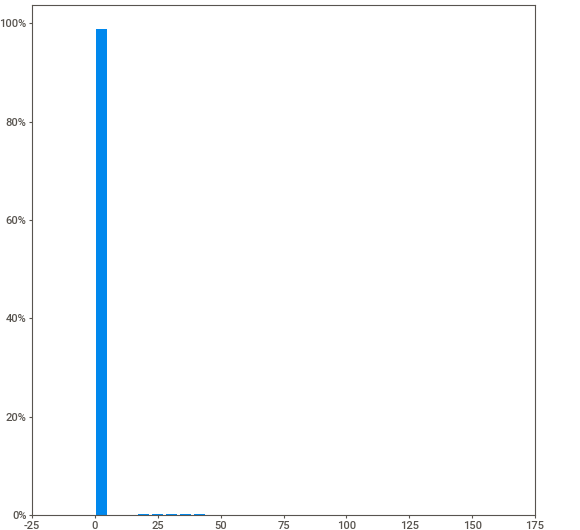
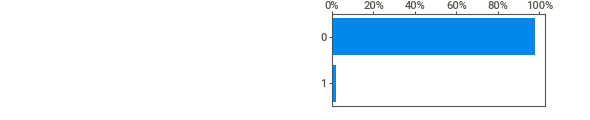
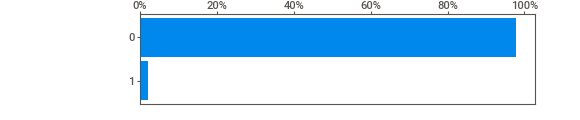
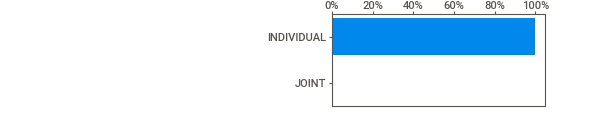
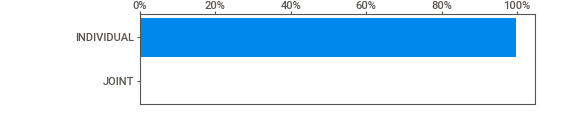
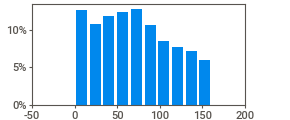
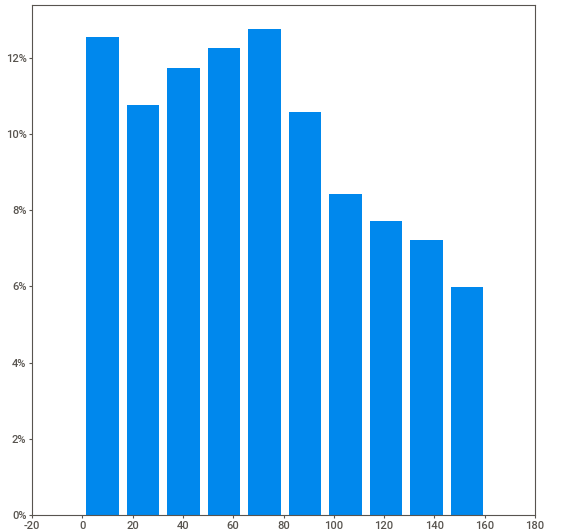
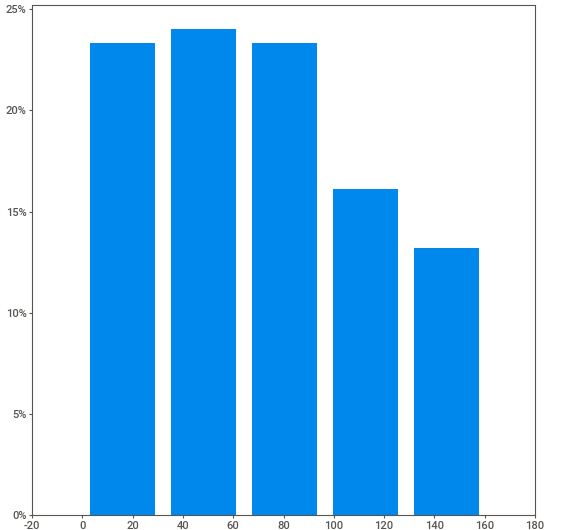
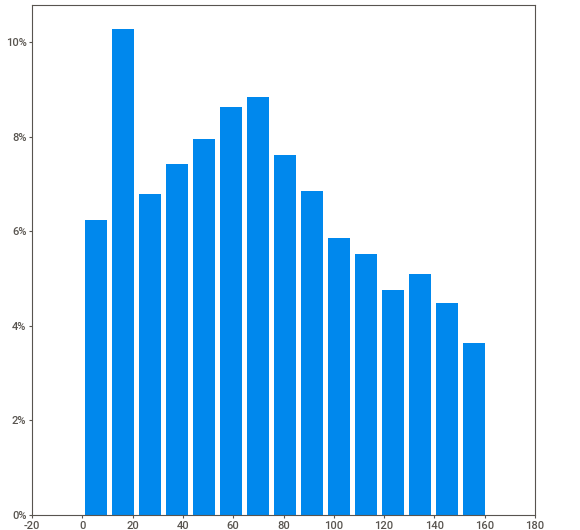
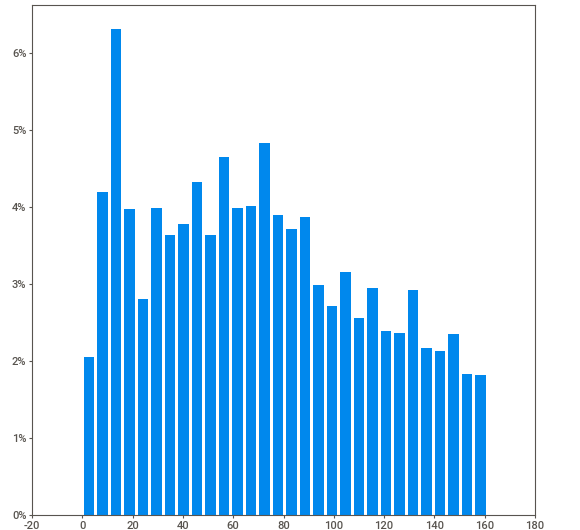
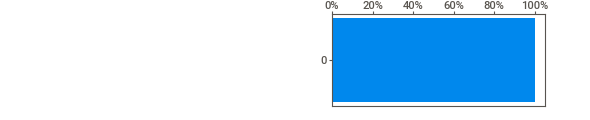
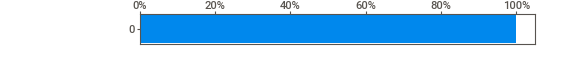
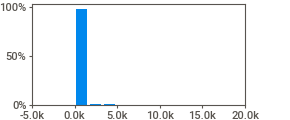
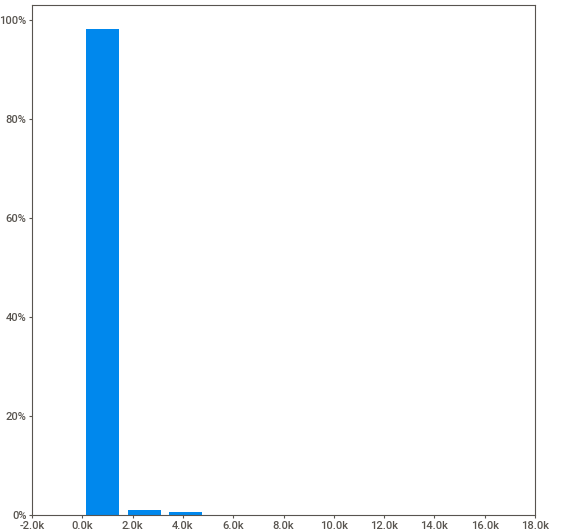
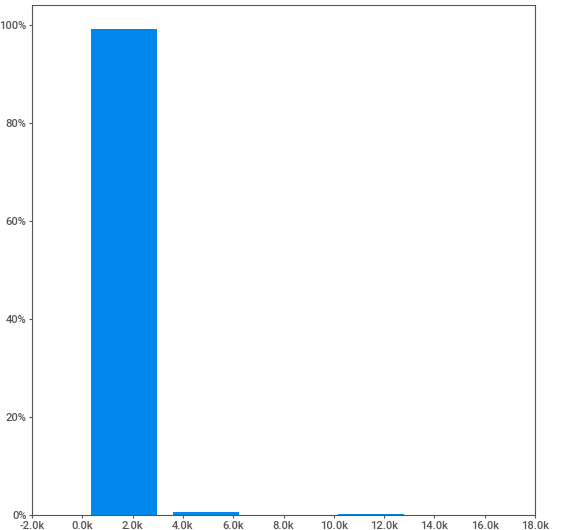
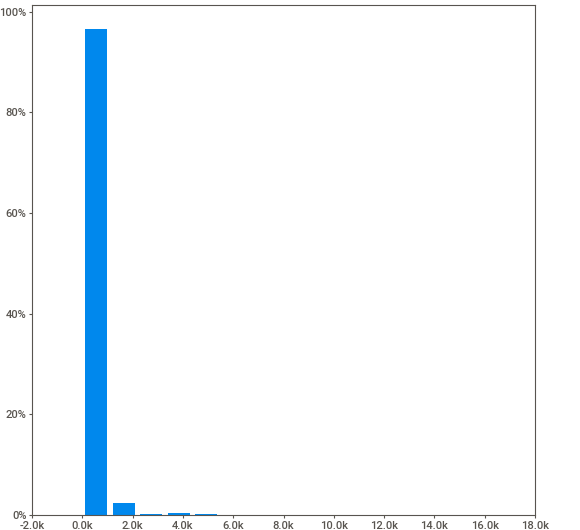
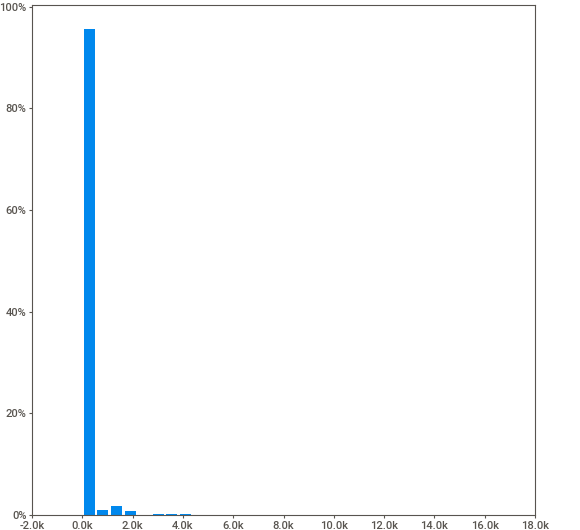
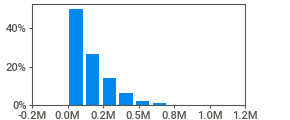
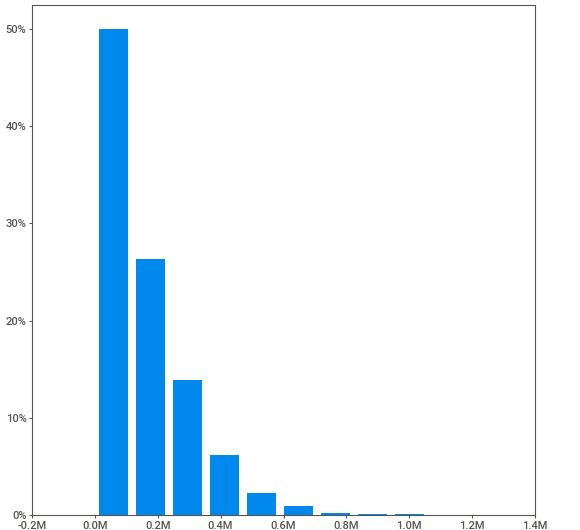
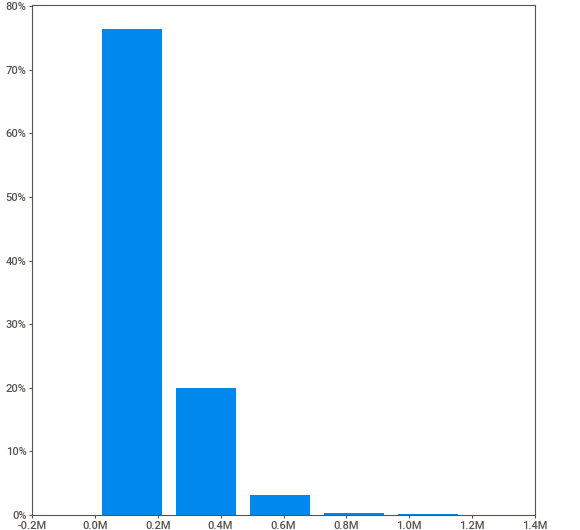
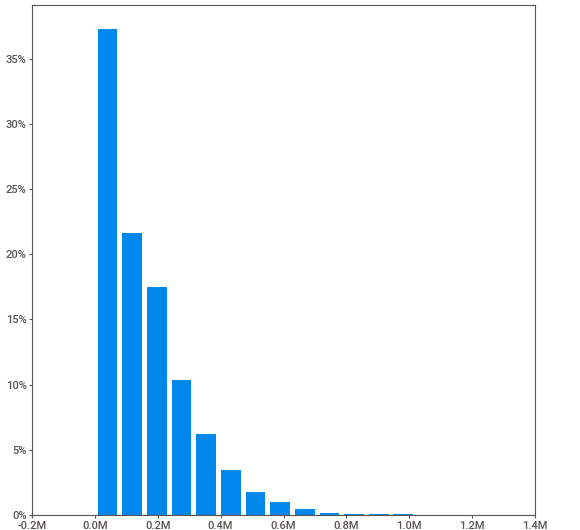
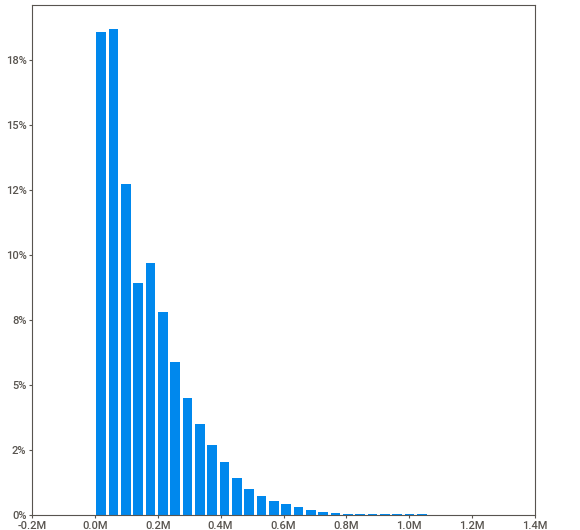
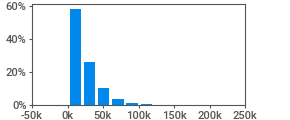
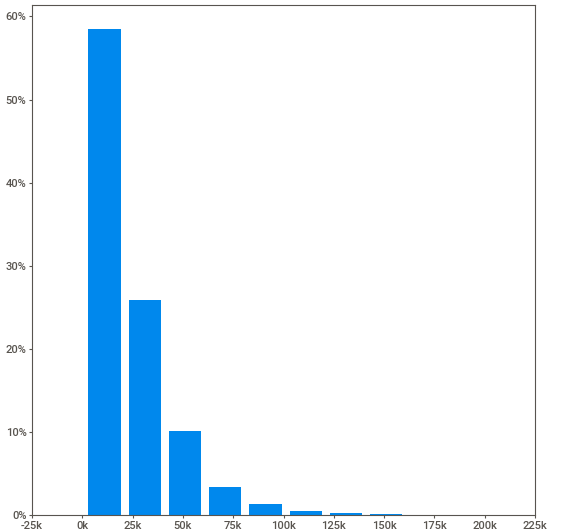
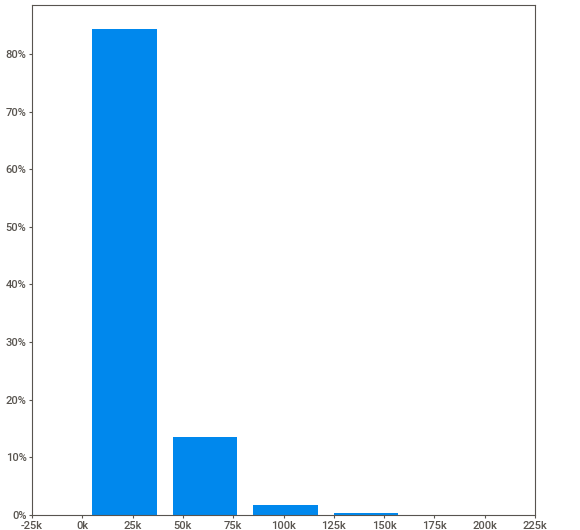
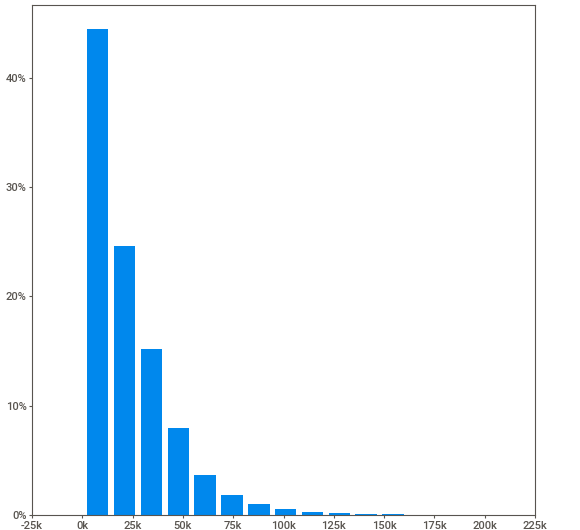
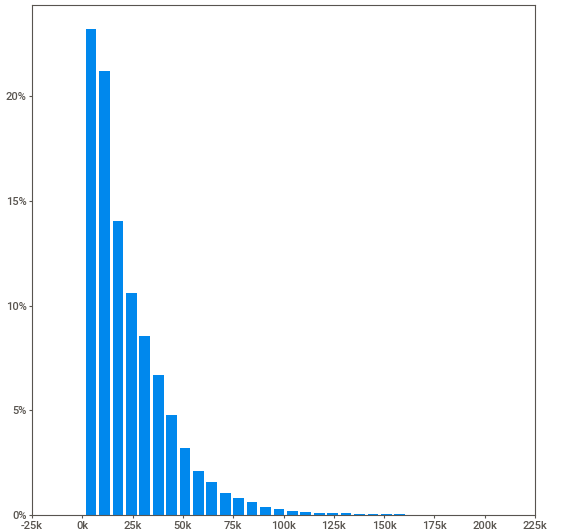
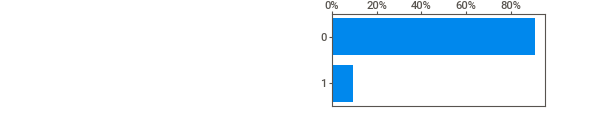
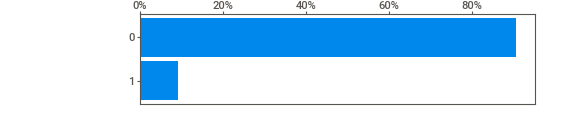
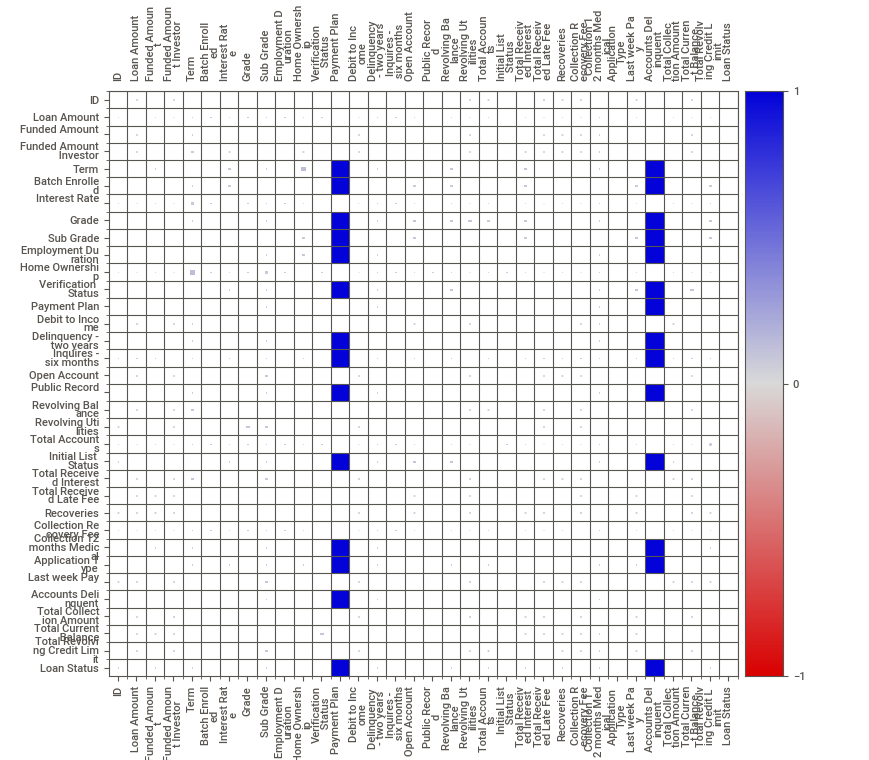
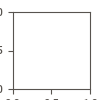

In [ ]:
IPython.display.HTML('analyze.html')

#### Graphics exploration

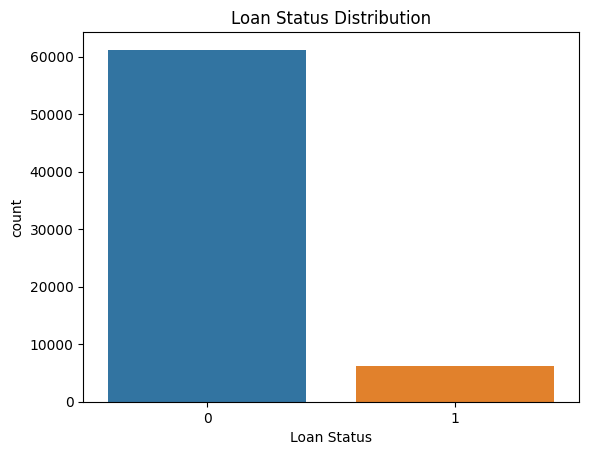

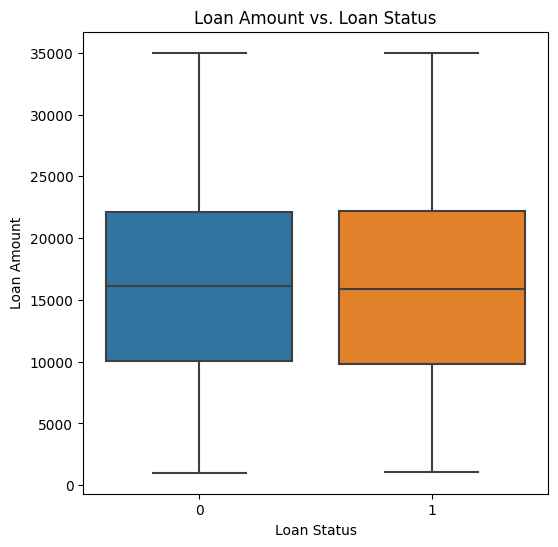

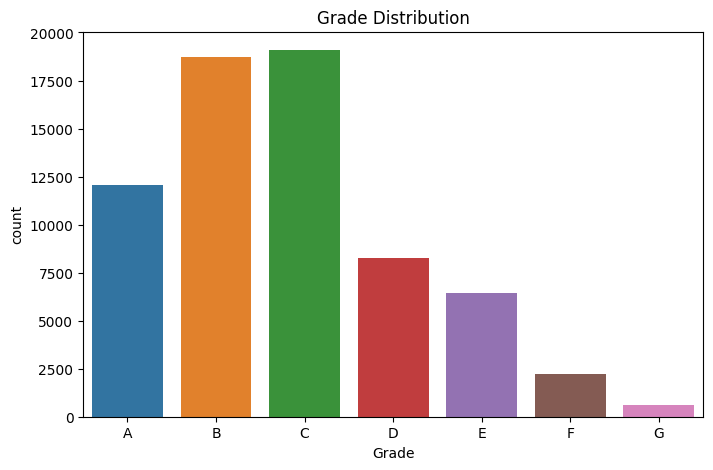

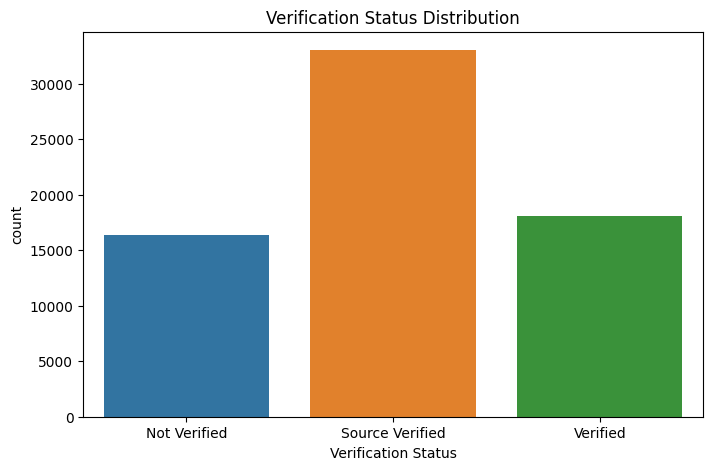

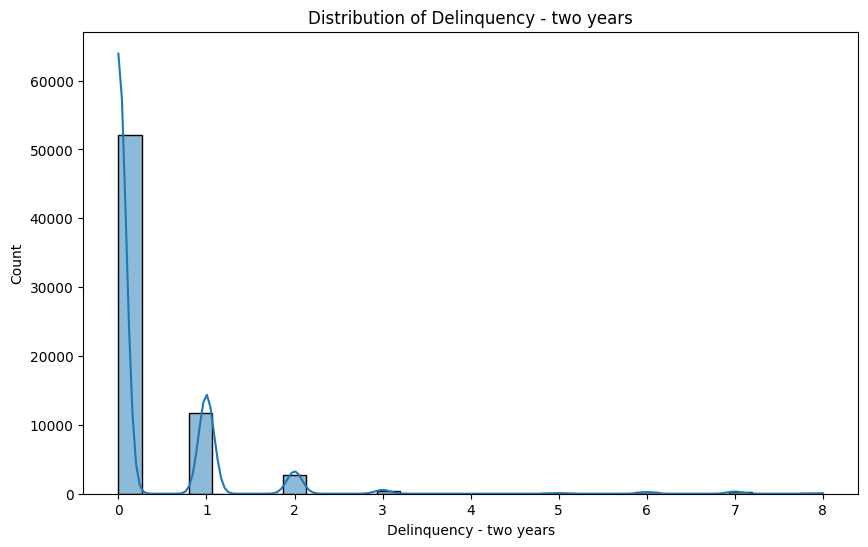

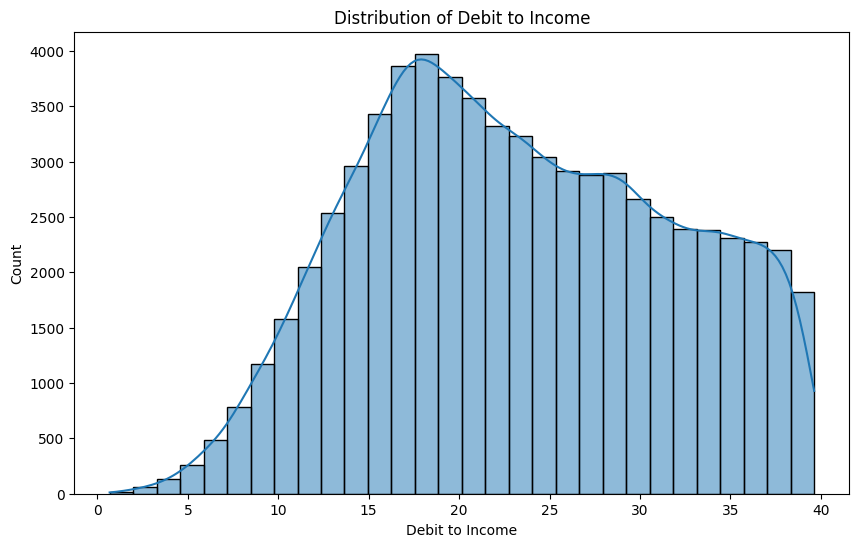

In [ ]:
# Visualize the distribution of Loan Status
sns.countplot(x='Loan Status', data=df)
plt.title('Loan Status Distribution')
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(6, 6))
sns.boxplot(x='Loan Status', y='Loan Amount', data=df)
plt.title('Loan Amount vs. Loan Status')
plt.show()

# Countplot for Grade
plt.figure(figsize=(8, 5))
sns.countplot(x='Grade', data=df, order=sorted(df['Grade'].unique()))
plt.title('Grade Distribution')
plt.show()

# Countplot for Verification Status
plt.figure(figsize=(8, 5))
sns.countplot(x='Verification Status', data=df)
plt.title('Verification Status Distribution')
plt.show()

# Histogram for Delinquency - two years
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Delinquency - two years', bins=30, kde=True)
plt.title('Distribution of Delinquency - two years')
plt.xlabel('Delinquency - two years')
plt.show()

# Histogram for Debit to Income
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Debit to Income', bins=30, kde=True)
plt.title('Distribution of Debit to Income')
plt.xlabel('Debit to Income')
plt.show()

#Data pre processing


##### Anova

In [67]:
from scipy.stats import f_oneway, chi2_contingency

# Separate the DataFrame into numerical and categorical attributes
numerical_attributes = df.select_dtypes(include=['int64', 'float64'])
categorical_attributes = df.select_dtypes(include=['object'])

# Create empty lists to store selected features for ANOVA
selected_features_anova = []

# Perform ANOVA for numerical attributes
for column in numerical_attributes.columns:
    p_value = f_oneway(df[df['Loan Status'] == 1][column], df[df['Loan Status'] == 0][column]).pvalue
    if p_value < 0.05:  # You can adjust the significance level (alpha) as needed
        selected_features_anova.append(column)

# Print the selected features for ANOVA
print("Selected features based on ANOVA:")
print(selected_features_anova)

# ANOVA results
anova_results = {}
for column in selected_features_anova:
    anova_result = f_oneway(df[df['Loan Status'] == 1][column], df[df['Loan Status'] == 0][column])
    anova_results[column] = anova_result.pvalue

# Print ANOVA results
print("ANOVA p-values for numerical attributes:")
print(anova_results)


Selected features based on ANOVA:
['Delinquency - two years', 'Public Record', 'Total Received Late Fee', 'Total Collection Amount', 'Total Current Balance', 'Loan Status']
ANOVA p-values for numerical attributes:
{'Delinquency - two years': 0.009462634922992178, 'Public Record': 0.005946386493849328, 'Total Received Late Fee': 0.014999219404735661, 'Total Collection Amount': 0.04037045067395023, 'Total Current Balance': 0.010689900265710124, 'Loan Status': 0.0}


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


##### chi-square

In [68]:
# Separate the DataFrame into numerical and categorical attributes
numerical_attributes = df.select_dtypes(include=['int64', 'float64'])
categorical_attributes = df.select_dtypes(include=['object'])

# Create empty lists to store selected features for ANOVA and Chi-Square
selected_features_chi2 = []

# Perform Chi-Square test for categorical attributes
for column in categorical_attributes.columns:
    contingency_table = pd.crosstab(df[column], df['Loan Status'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    if p_value < 0.05:
        selected_features_chi2.append(column)

# 2. Chi-Square for categorical attributes
chi2_results = {}
for column in selected_features_chi2:
    contingency_table = pd.crosstab(df[column], df['Loan Status'])
    chi2_result = chi2_contingency(contingency_table)
    chi2_results[column] = chi2_result[1]

# Print Chi-Square results
print("\nChi-Square p-values for categorical attributes:")
print(chi2_results)



print("\nSelected features based on Chi-Square:")
print(selected_features_chi2)


Chi-Square p-values for categorical attributes:
{'Grade': 0.0293605144624493, 'Employment Duration': 0.000318849414713897, 'Initial List Status': 0.0005038281525924869}

Selected features based on Chi-Square:
['Grade', 'Employment Duration', 'Initial List Status']


#####  Autocorrelation and multicollinearity

In [ ]:
variables_anova = df[selected_features_anova]
variables_chi2 = df[selected_features_chi2]

# Concat two lists
selected_variables = pd.concat([variables_anova, variables_chi2], axis=1)

# Calculate the correlation matrix
correlation_matrix = selected_variables.corr()

# Correlation matrix
print("Matriz de Correlação:")
print(correlation_matrix)


Matriz de Correlação:
                         Delinquency - two years  Public Record  \
Delinquency - two years                 1.000000       0.006716   
Public Record                           0.006716       1.000000   
Total Received Late Fee                 0.007943       0.016594   
Total Collection Amount                 0.005642       0.012928   
Total Current Balance                   0.002602       0.003935   
Loan Status                             0.009990       0.010590   

                         Total Received Late Fee  Total Collection Amount  \
Delinquency - two years                 0.007943                 0.005642   
Public Record                           0.016594                 0.012928   
Total Received Late Fee                 1.000000                 0.007441   
Total Collection Amount                 0.007441                 1.000000   
Total Current Balance                  -0.000526                 0.005318   
Loan Status                             0.0093

<ipython-input-53-1f24d5312a59>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_variables.corr()


In [ ]:
# matriz de correlação
correlation_matrix = selected_variables.corr()

# valores próprios
eigenvalues = np.linalg.eigvals(correlation_matrix)

# Examinar os valores próprios
print("Eigenvalues:")
print(eigenvalues)


Eigenvalues:
[1.04092074 0.98183245 0.98600066 0.99150041 0.99658361 1.00316213]


<ipython-input-54-4391f1f40d3d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_variables.corr()


These results suggest that there is no significant multicollinearity between the variables selected by the ANOVA and Chi-square and eigenvalues test. Therefore, there is no impediment to proceed with the construction of predictive models using these variables.

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Variáveis selecionadas
features_anova = ['Delinquency - two years', 'Public Record', 'Total Received Late Fee', 'Total Collection Amount', 'Total Current Balance', 'Loan Status']
features_chi2 = ['Grade', 'Employment Duration', 'Initial List Status']

# Criar DataFrame com as variáveis selecionadas
selected_features = df[features_anova + features_chi2]

# Separar variáveis preditoras (X) e variável alvo (y)
X = selected_features.drop('Loan Status', axis=1)
y = selected_features['Loan Status']

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pré-processamento: normalizar numéricas e codificar categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), X.select_dtypes(include=['object']).columns)
    ])

# Criar pipeline com pré-processamento e modelo k-NN
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Parâmetros a serem ajustados
param_grid = {'classifier__n_neighbors': range(1, 20)}

# Criar objeto GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Executar busca em grade
grid_search.fit(X_train, y_train)

# Melhor número de vizinhos encontrado
best_neighbors = grid_search.best_params_['classifier__n_neighbors']
print(f'Melhor número de vizinhos: {best_neighbors}')

# Avaliar modelo final
accuracy = grid_search.score(X_test, y_test)
print(f'Acurácia do modelo: {accuracy:.2f}')


Melhor número de vizinhos: 16
Acurácia do modelo: 0.91


#### Naive-Bayes

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Variáveis selecionadas
features_anova = ['Delinquency - two years', 'Public Record', 'Total Received Late Fee', 'Total Collection Amount', 'Total Current Balance', 'Loan Status']
features_chi2 = ['Grade', 'Employment Duration', 'Initial List Status']

# Criar DataFrame com as variáveis selecionadas
selected_features = df[features_anova + features_chi2]

# Separar variáveis preditoras (X) e variável alvo (y)
X = selected_features.drop('Loan Status', axis=1)
y = selected_features['Loan Status']

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pré-processamento: normalizar numéricas e codificar categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), X.select_dtypes(include=['object']).columns)
    ])

# Criar pipeline com pré-processamento e modelo k-NN
pipeline = make_pipeline(preprocessor,  GaussianNB())

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[11762   513]
 [ 1150    68]] : is the confusion matrix
0.876750907878159 : is the accuracy score
0.11703958691910499 : is the precision score
0.05582922824302135 : is the recall score
0.075597554196776 : is the f1 score


###### data normalized

In [73]:
X_transformed = preprocessor.transform(X_train)
df_transformed = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out(X_train.columns))
df_transformed.head()


num__Delinquency - two years  num__Public Record  \
0                     -0.409178           -0.233174   
1                     -0.409178           -0.233174   
2                     -0.409178           -0.233174   
3                      0.836779           -0.233174   
4                      2.082735           -0.233174   

   num__Total Received Late Fee  num__Total Collection Amount  \
0                     -0.203746                     -0.152587   
1                     -0.210609                     -0.135168   
2                     -0.215154                     -0.171345   
3                     -0.218210                     -0.174025   
4                     -0.205098                     -0.178044   

   num__Total Current Balance  cat__Grade_A  cat__Grade_B  cat__Grade_C  \
0                   -0.563734           0.0           0.0           0.0   
1                    5.857084           0.0           0.0           1.0   
2                    0.326827           1.0           0.0           0.0   
3                    0.824535           0.0           1.0           0.0   
4                   -0.422722           0.0           0.0           0.0   

   cat__Grade_D  cat__Grade_E  cat__Grade_F  cat__Grade_G  \
0           1.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0   
4           1.0           0.0           0.0           0.0   

   cat__Employment Duration_MORTGAGE  cat__Employment Duration_OWN  \
0                                0.0                           1.0   
1                                0.0                           1.0   
2                                1.0                           0.0   
3                                1.0                           0.0   
4                                1.0                           0.0   

   cat__Employment Duration_RENT  cat__Initial List Status_f  \
0                            0.0                         1.0   
1                            0.0                         1.0   
2                            0.0                         1.0   
3                            0.0                         1.0   
4                            0.0                         1.0   

   cat__Initial List Status_w  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0

##### data compare

In [70]:
compare_report = sv.compare([X_train, 'Train'], [X_test, 'Test'])
compare_report.show_html('compare.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report compare.html was generated.



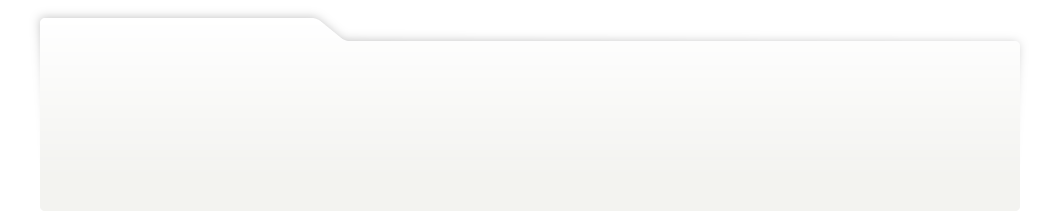
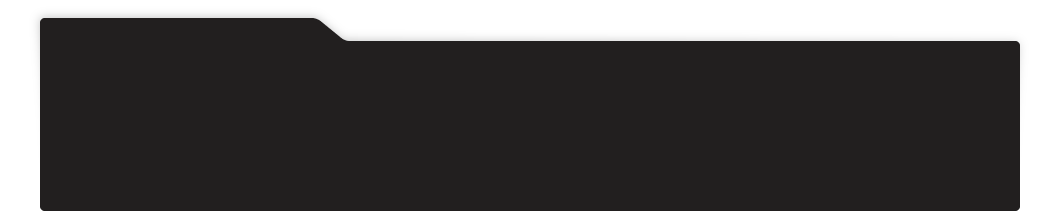
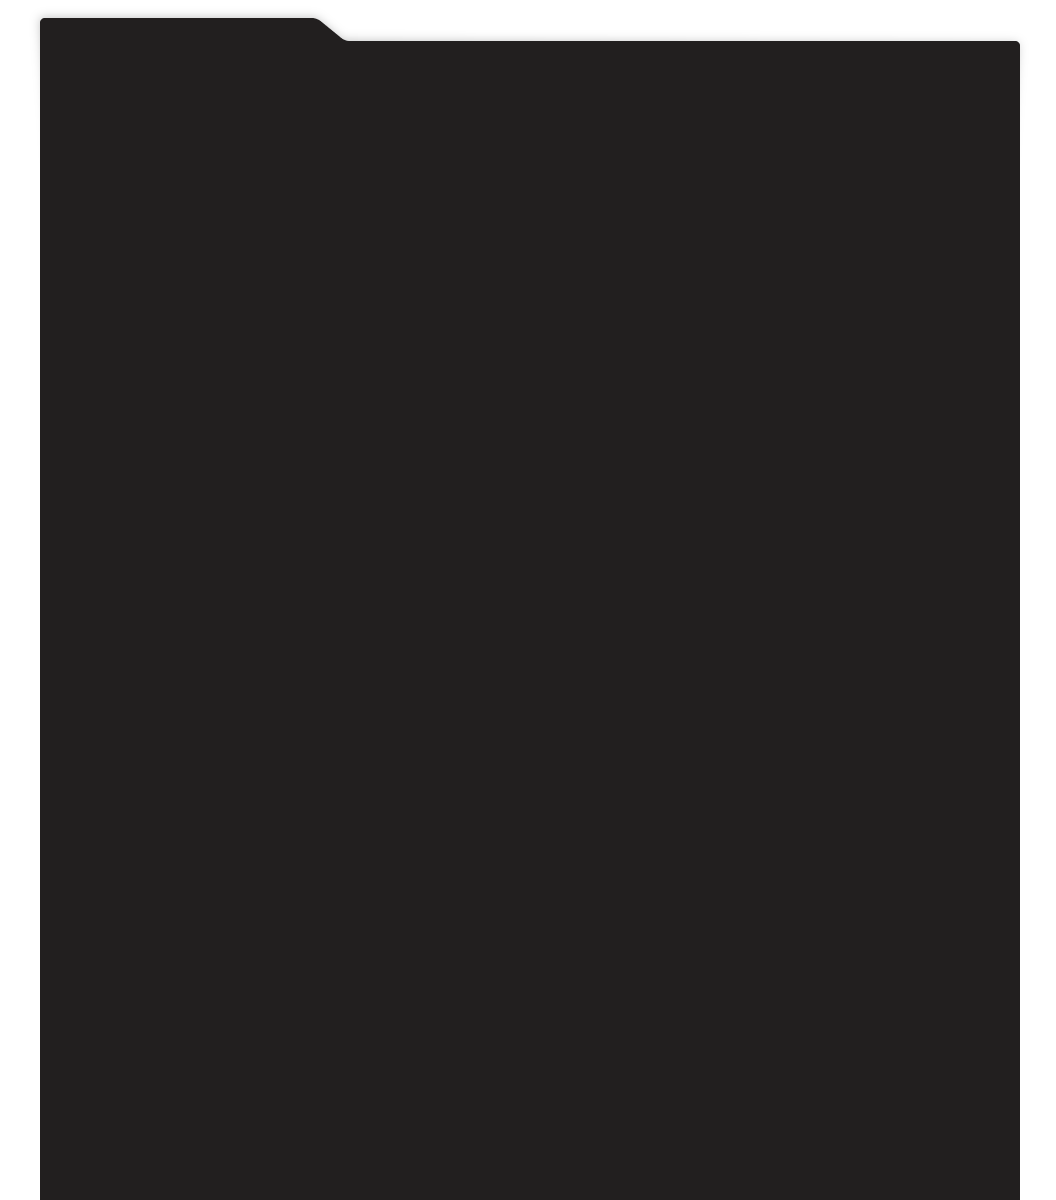
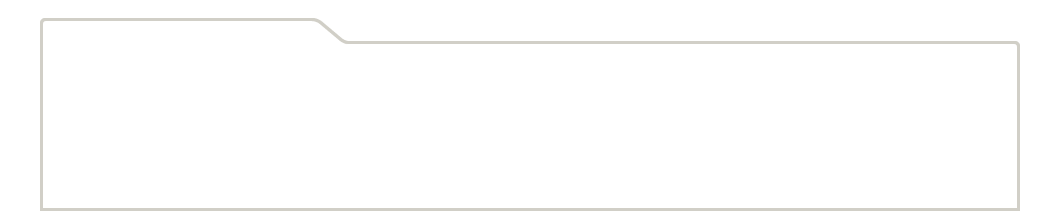
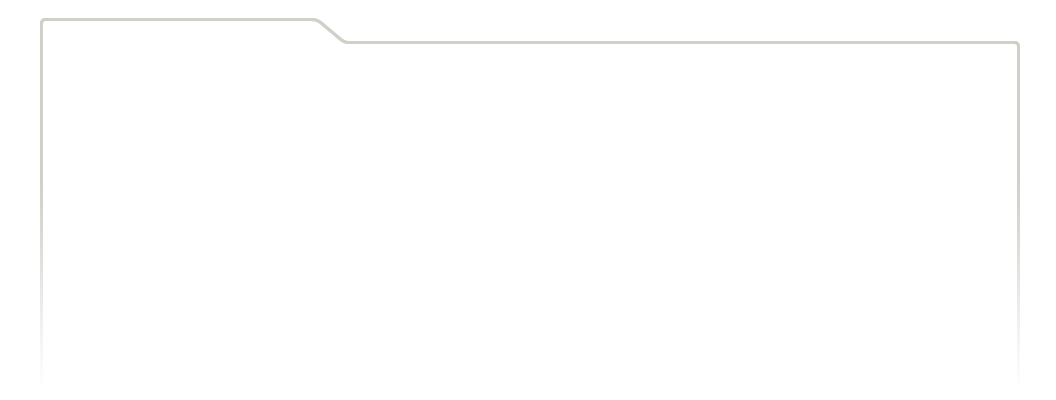
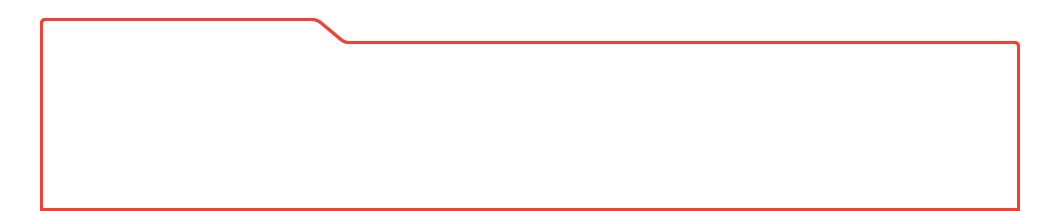
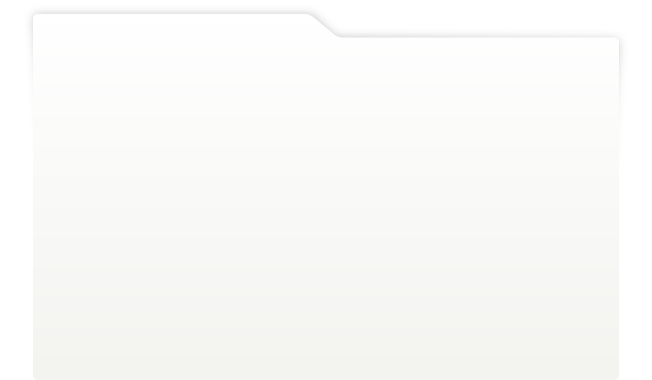
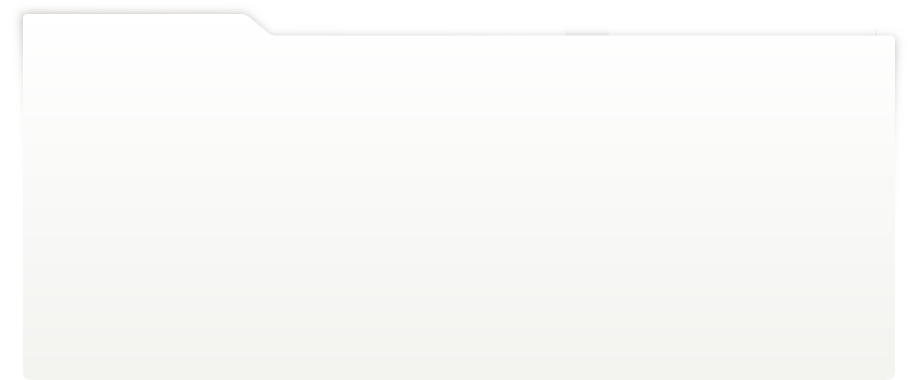
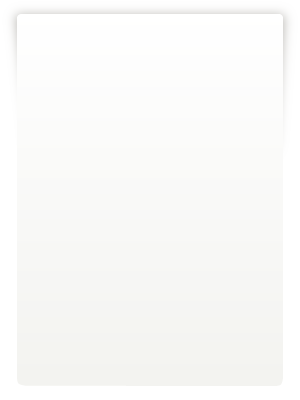
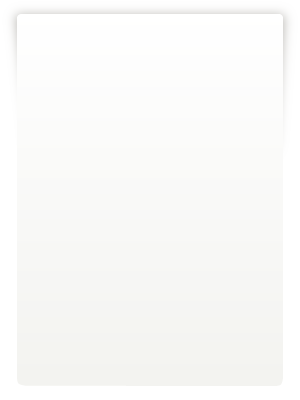
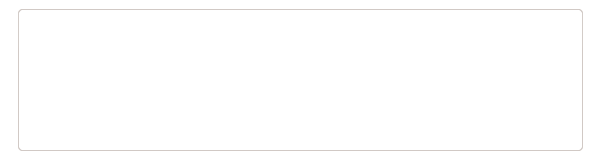
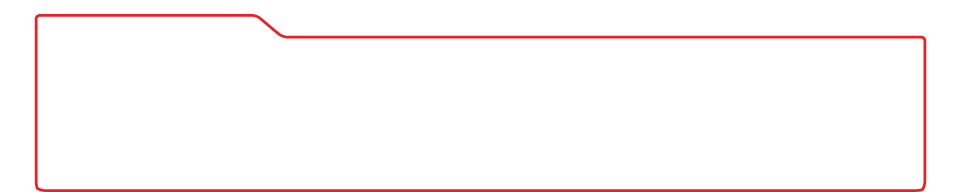
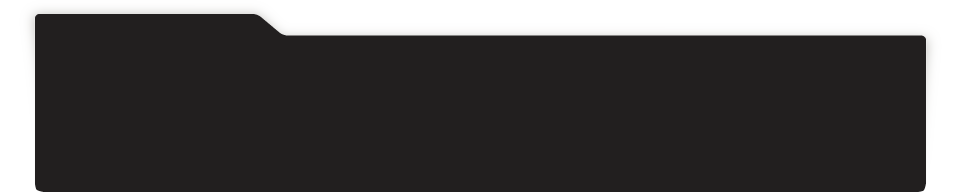
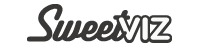
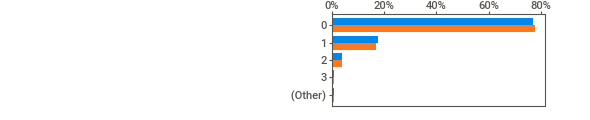
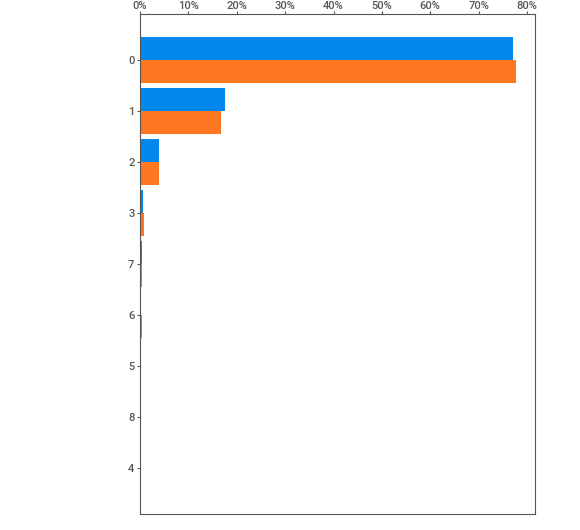
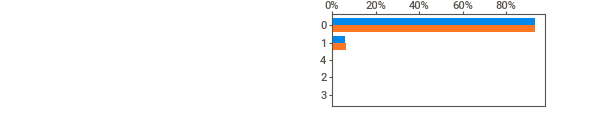
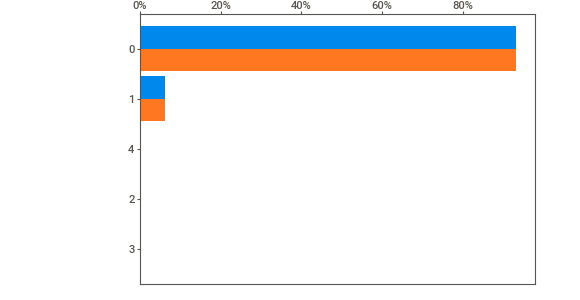
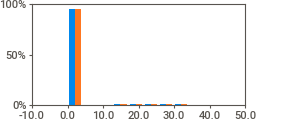
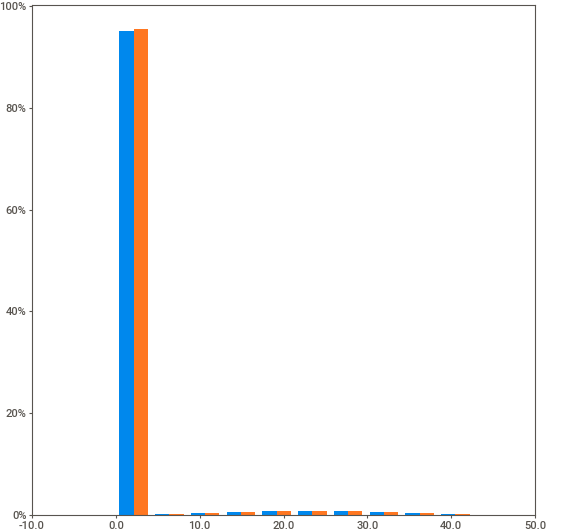
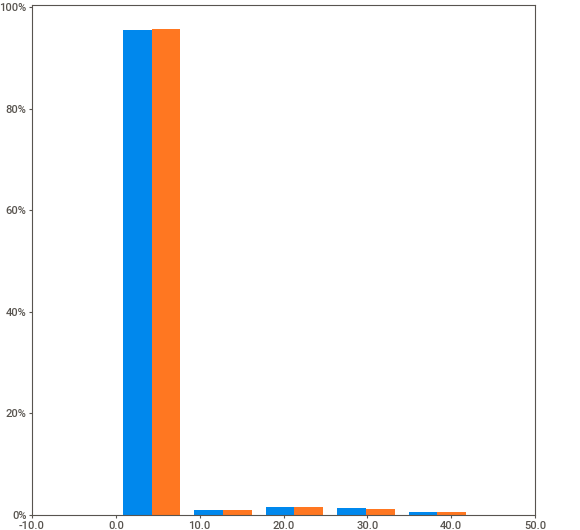
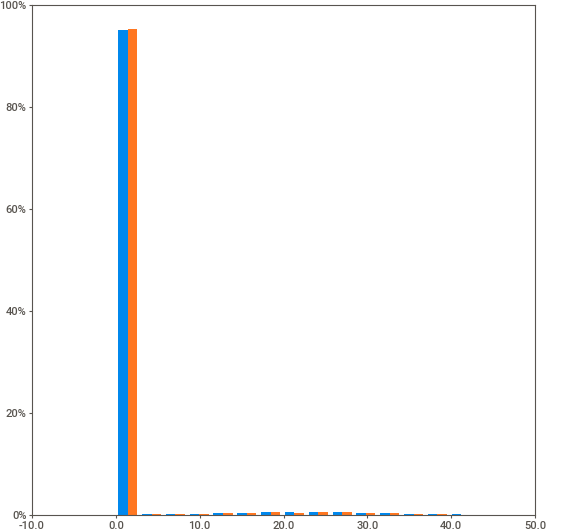
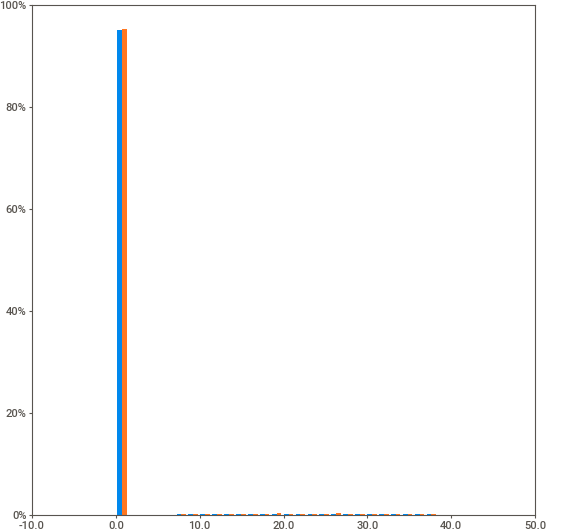
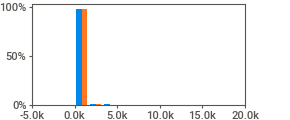
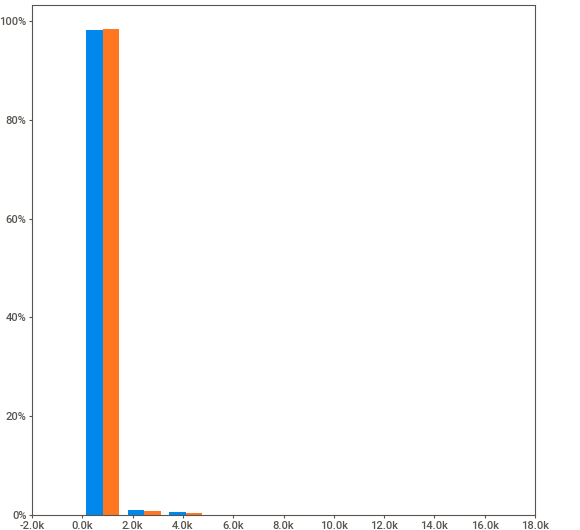
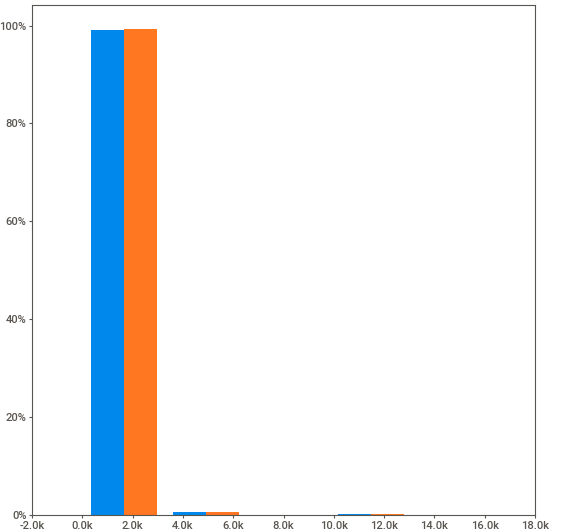
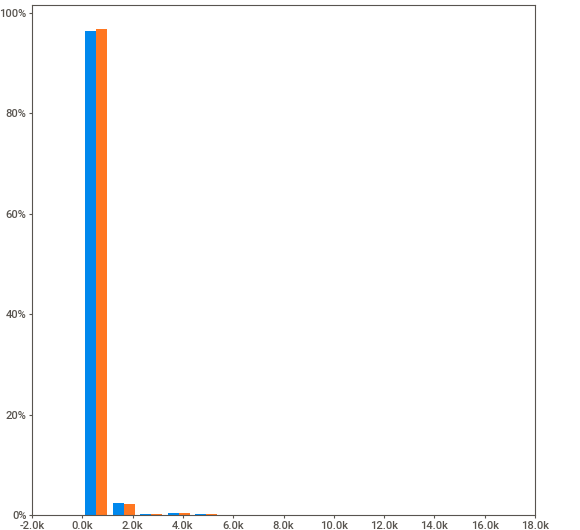
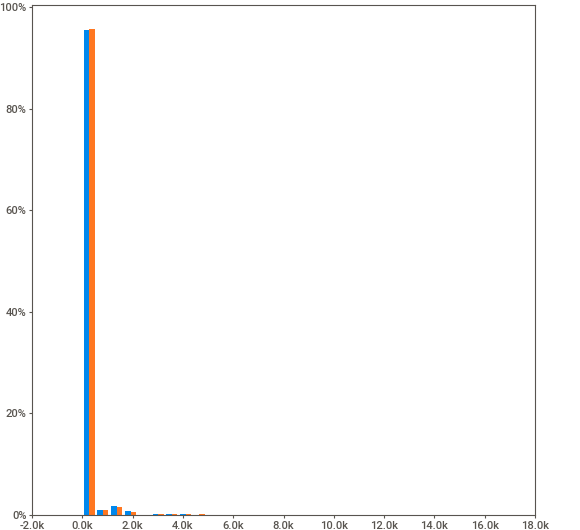
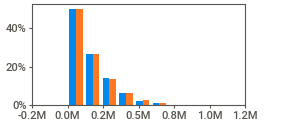
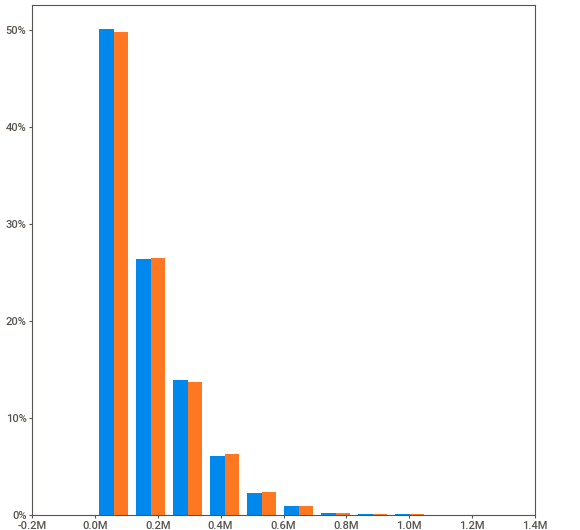
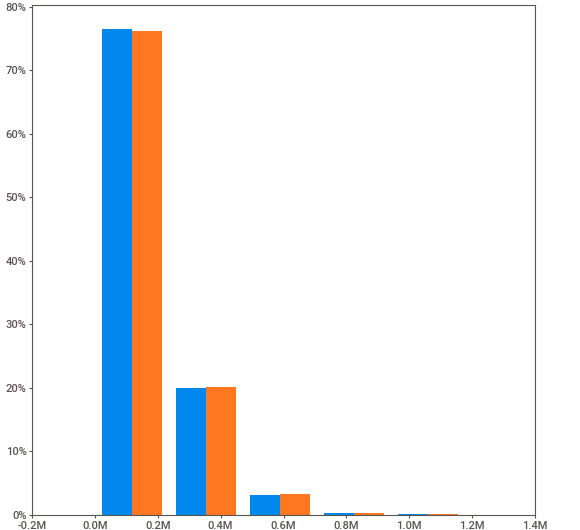
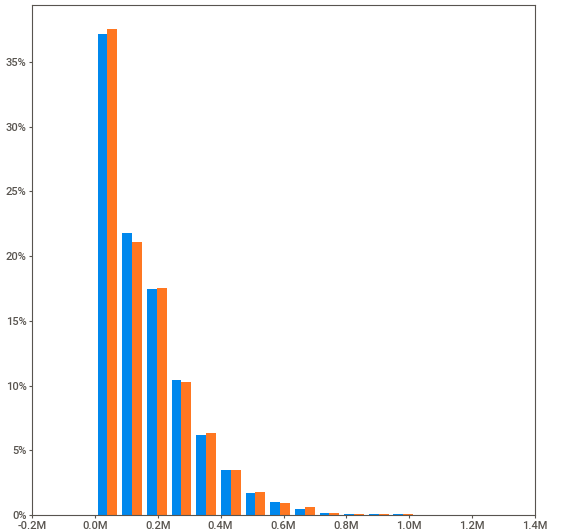
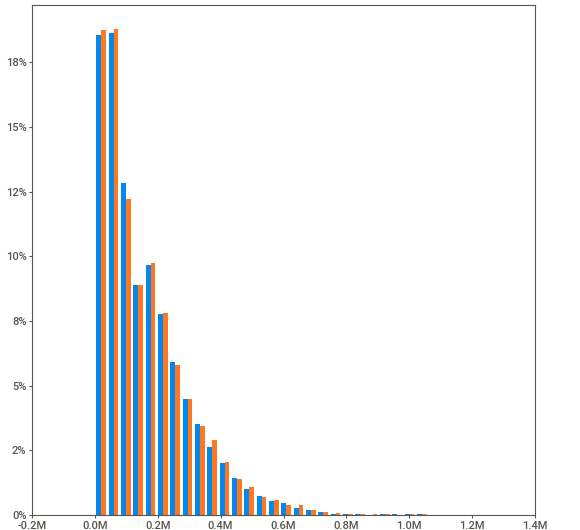
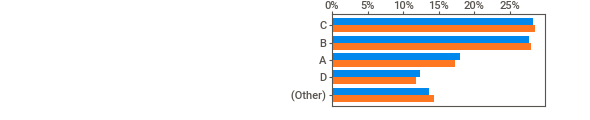
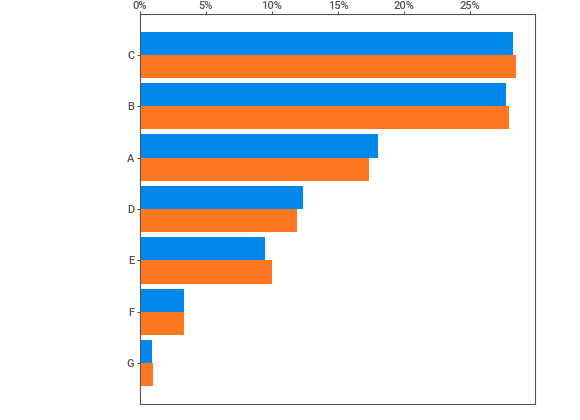
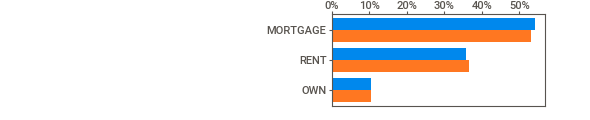
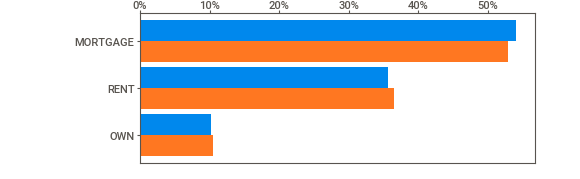
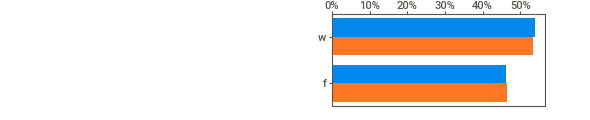
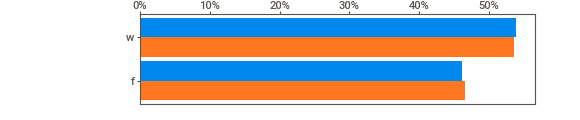
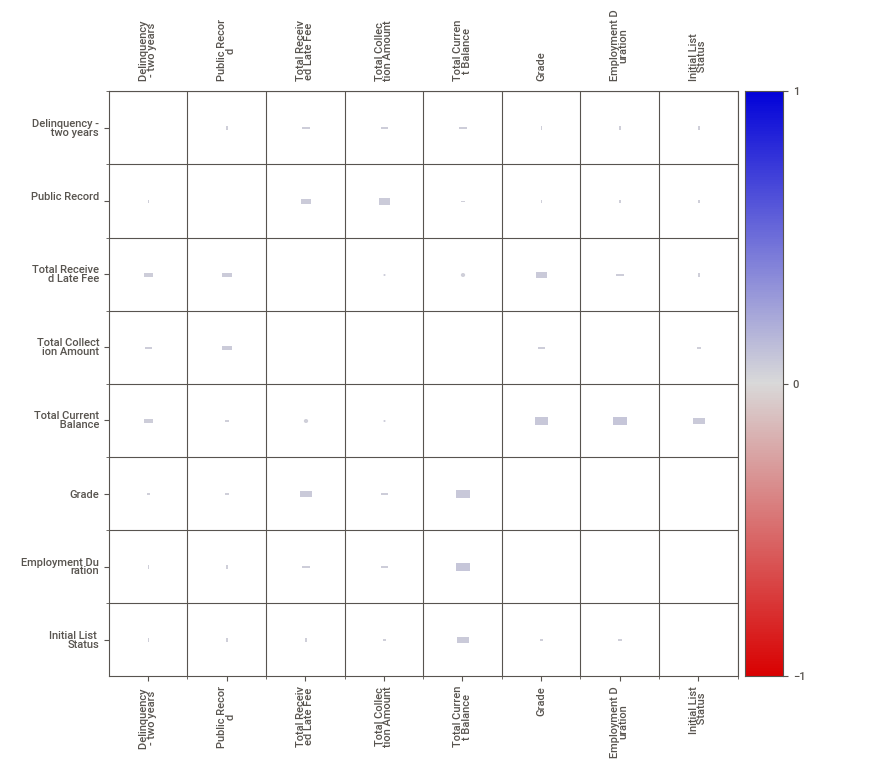
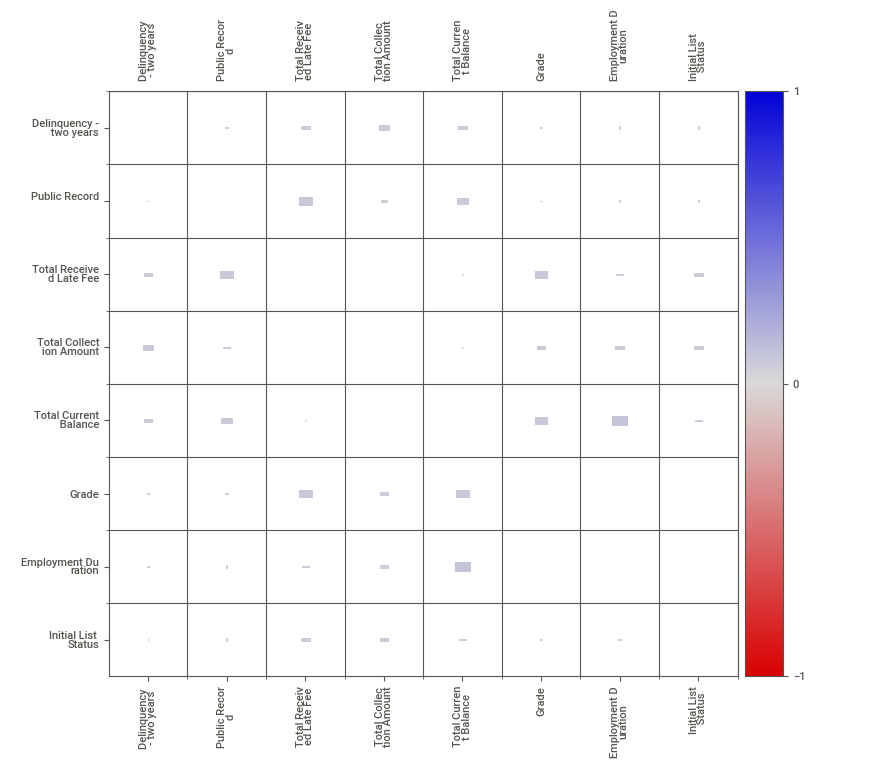

In [71]:
#displaying results
IPython.display.HTML('compare.html')

In [1]:
clf = LazyClassifier(verbose=0,predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

NameError: ignored

# Model Evaluation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Variáveis selecionadas
features_anova = ['Delinquency - two years', 'Public Record', 'Total Received Late Fee', 'Total Collection Amount', 'Total Current Balance', 'Loan Status']
features_chi2 = ['Grade', 'Employment Duration', 'Initial List Status']

# Criar DataFrame com as variáveis selecionadas
selected_features = df[features_anova + features_chi2]

# Separar variáveis preditoras (X) e variável alvo (y)
X = selected_features.drop('Loan Status', axis=1)
y = selected_features['Loan Status']

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
GaussianPipeline = make_pipeline(preprocessor,  GaussianNB())

KNeighborsPipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), X.select_dtypes(include=['object']).columns)
    ])


models = []
models.append(('KNN', KNeighborsPipeline))
models.append(('GNB', GaussianPipeline))

results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, shuffle=True, random_state=123)
  cv_results = cross_val_score(model, X_train, y_train,cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
  print(msg)

print(results)

KNN: 0.901019 (0.004130)
GNB: 0.867704 (0.011952)
[array([0.89327404, 0.90550306, 0.89512692, 0.90402075, 0.9047619 ,
       0.90605892, 0.9001297 , 0.89938855, 0.89957384, 0.90235316]), array([0.86548082, 0.88085974, 0.87122475, 0.8612192 , 0.88215675,
       0.86937187, 0.85010191, 0.88586252, 0.85992218, 0.85084306])]


#TEST preproces

In [ ]:
Testdf = df[features_anova + features_chi2]
#Separate cat and num
numeric_cols = Testdf.select_dtypes(include=np.number).columns.tolist()
categorical_cols = Testdf.select_dtypes('object').columns.tolist()
numeric_cols, categorical_cols


(['Delinquency - two years',
  'Public Record',
  'Total Received Late Fee',
  'Total Collection Amount',
  'Total Current Balance',
  'Loan Status'],
 ['Grade', 'Employment Duration', 'Initial List Status'])

In [ ]:
#MinMax scaler to numerical
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Testdf[numeric_cols])
Testdf[numeric_cols].describe().loc[['min','max'],:]

Delinquency - two years  Public Record  Total Received Late Fee  \
min                      0.0            0.0                 0.000003   
max                      8.0            4.0                42.618882   

     Total Collection Amount  Total Current Balance  Loan Status  
min                      1.0                  617.0          0.0  
max                  16421.0              1177412.0          1.0

In [ ]:
Testdf[numeric_cols] = scaler.transform(Testdf[numeric_cols])
Testdf[numeric_cols].describe().loc[['min','max'],:]

<ipython-input-19-5b14d4d094b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Testdf[numeric_cols] = scaler.transform(Testdf[numeric_cols])


Delinquency - two years  Public Record  Total Received Late Fee  \
min                      0.0            0.0                      0.0   
max                      1.0            1.0                      1.0   

     Total Collection Amount  Total Current Balance  Loan Status  
min                      0.0                    0.0          0.0  
max                      1.0                    1.0          1.0

In [ ]:
#Categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(Testdf[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols,len(encoded_cols))

['Grade_A', 'Grade_B', 'Grade_C', 'Grade_D', 'Grade_E', 'Grade_F', 'Grade_G', 'Employment Duration_MORTGAGE', 'Employment Duration_OWN', 'Employment Duration_RENT', 'Initial List Status_f', 'Initial List Status_w'] 12


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<ipython-input-22-dafda3ad6974>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Testdf[encoded_cols] = encoder.transform(Testdf[categorical_cols])
<ipython-input-22-dafda3ad6974>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Testdf[encoded_cols] = encoder.transform(Testdf[categorical_cols])
<ipython-input-22-dafda3ad6974>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Delinquency - two years  Public Record  Total Received Late Fee  \
0                        0.125           0.00                 0.002395   
1                        0.000           0.00                 0.000849   
2                        0.000           0.00                 0.440618   
3                        0.125           0.00                 0.001035   
4                        0.125           0.25                 0.453007   
...                        ...            ...                      ...   
67458                    0.125           0.00                 0.000551   
67459                    0.000           0.00                 0.000636   
67460                    0.000           0.25                 0.000662   
67461                    0.000           0.00                 0.001748   
67462                    0.000           0.00                 0.000016   

       Total Collection Amount  Total Current Balance  Loan Status Grade  \
0                     0.001827               0.264009          0.0     B   
1                     0.003167               0.154651          0.0     C   
2                     0.002010               0.075786          0.0     F   
3                     0.002375               0.007284          0.0     C   
4                     0.026127               0.106571          0.0     C   
...                        ...                    ...          ...   ...   
67458                 0.002862               0.153942          1.0     C   
67459                 0.002192               0.018759          0.0     C   
67460                 0.000974               0.149763          0.0     A   
67461                 0.003654               0.306529          0.0     D   
67462                 0.002801               0.166846          0.0     B   

      Employment Duration Initial List Status  Grade_A  ...  Grade_C  Grade_D  \
0                MORTGAGE                   w      0.0  ...      0.0      0.0   
1                    RENT                   f      0.0  ...      1.0      0.0   
2                MORTGAGE                   w      0.0  ...      0.0      0.0   
3                MORTGAGE                   w      0.0  ...      1.0      0.0   
4                MORTGAGE                   w      0.0  ...      1.0      0.0   
...                   ...                 ...      ...  ...      ...      ...   
67458            MORTGAGE                   w      0.0  ...      1.0      0.0   
67459                RENT                   w      0.0  ...      1.0      0.0   
67460            MORTGAGE                   w      1.0  ...      0.0      0.0   
67461                 OWN                   f      0.0  ...      0.0      1.0   
67462            MORTGAGE                   f      0.0  ...      0.0      0.0   

       Grade_E  Grade_F  Grade_G  Employment Duration_MORTGAGE  \
0          0.0      0.0      0.0                           1.0   
1          0.0      0.0      0.0                           0.0   
2          0.0      1.0      0.0                           1.0   
3          0.0      0.0      0.0                           1.0   
4          0.0      0.0      0.0                           1.0   
...        ...      ...      ...                           ...   
67458      0.0      0.0      0.0                           1.0   
67459      0.0      0.0      0.0                           0.0   
67460      0.0      0.0      0.0                           1.0   
67461      0.0      0.0      0.0                           0.0   
67462      0.0      0.0      0.0                           1.0   

       Employment Duration_OWN  Employment Duration_RENT  \
0                          0.0                       0.0   
1                          0.0                       1.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
...                        ...                       ...   
67458              

#gaussianNB with new preprocess

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Separar variáveis preditoras (X) e variável alvo (y)
X = Testdf.drop(['Loan Status', 'Grade', 'Employment Duration', 'Initial List Status'], axis=1)
y = Testdf['Loan Status']

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[11762   513]
 [ 1150    68]] : is the confusion matrix
0.876750907878159 : is the accuracy score
0.11703958691910499 : is the precision score
0.05582922824302135 : is the recall score
0.075597554196776 : is the f1 score
